# Selling Apartments in St. Petersburg - Real Estate Market Analysis

We have an archive of real estate listings in St. Petersburg and neighboring areas spanning several years. The objective is to determine the market value of these properties in order to build an automated system that will track anomalies and fraudulent activities.

For each property listed for sale, two types of data are available. The first type is entered by users, while the second type is obtained automatically based on geographical data. For example, this includes distances to the city center, the airport, the nearest park, and bodies of water

In [165]:
# Import necessary libraries for work

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv')

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

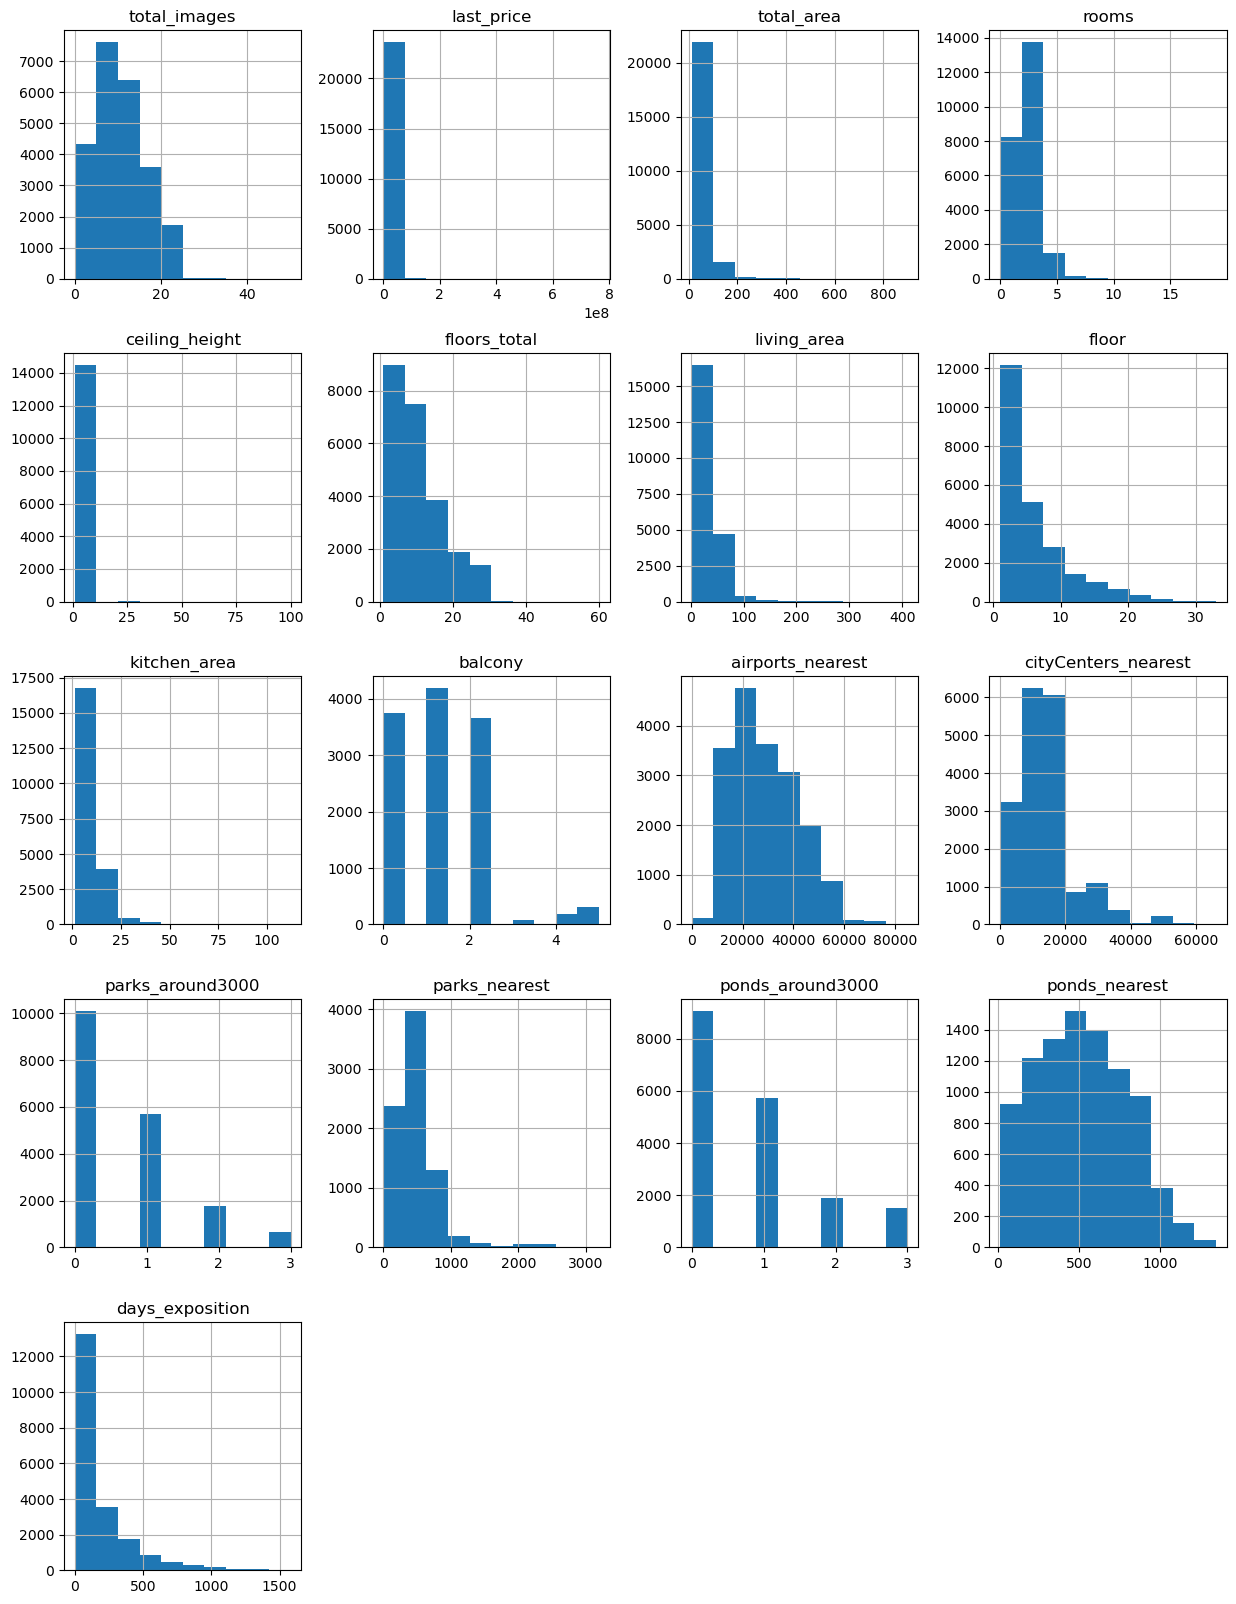

In [6]:
data.hist(figsize=(15, 20))

After displaying the general information, we see that we need to pay attention to the following:

- Standardize the column headers (rename them to "cityCenters," "parks_around3000," "ponds_around3000").

- Handle missing values.

- Check for duplicate data.

- Eliminate outliers and anomalous values.

Check data types ("first_day_exposition" should be converted to datetime instead of object, which likely affects missing values in the "days_exposition" column; "is_apartment," 'open_plan,' "studio" should be converted to boolean; "total_images," 'rooms,' 'floors_total,' 'floor,' 'balcony,' 'parks_around_3000,' 'ponds_around_3000' should be converted to integers).

In [7]:
data.columns  # Display a list of existing column names on the screen

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
# Rename column names
data.columns = ['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition']

# Display the updated list of column names
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

## Missing values

In [9]:
# Count the number of missing values in 'data'
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In the column "ceiling_height," there are 9195 missing values. It is important to determine whether this is a systematic error and how to handle these missing values. Let's take a look at the data where "ceiling_height" values are missing.

In [10]:
data.loc[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Most likely, ceiling height data simply wasn't entered, but the missing values account for almost 39% of the sample (9195/23699). Deleting these rows would have a significant impact on the results, so it makes sense to fill the gaps with the mean value. However, it is necessary to check the data in the column for outliers first.

In [11]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Minimum value: 1 meter. It is possible that an error was made. It is necessary to check how many such data points are in the table.
Maximum value: 100 meters. This value is very high, and there is a probability that it's an outlier.
Calculate the median and assign its value to the variable ceiling_height_median.

In [12]:
ceiling_height_median = data['ceiling_height'].median()
ceiling_height_median

2.65

The median and mean values do not differ significantly. So, the next step is to clean the errors in the 'ceiling_height' column data. Let's take a look at the unique values:

In [13]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Ceiling heights of more than 4.5 meters in an apartment seem improbable. Let's display them on the screen.

In [14]:
data.loc[(data['ceiling_height']> 4.5) &
         (data['is_apartment'] == True)].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In the first and second rows, there are likely errors. Let's correct them manually. As for the third row, the data raises too many questions: 100-meter (or even 10-meter, if we assume the same error as in the two rows above) ceilings on the 5th floor with 5 balconies. It's better to exclude this "sample" from the dataset.

In [15]:
data.loc[data['ceiling_height'] == 24.0] = 2.4
data.loc[data['ceiling_height'] == 27.0] = 2.7

Now let's take a look at the rows with suspiciously high ceilings where data in the "is_apartment" column is missing:

In [16]:
data.loc[(data['ceiling_height']> 4.5) &
         (data['is_apartment'].isna())].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12401,20.0,91500000.0,495.0,2017-06-19T00:00:00,7.0,4.65,7.0,347.5,7.0,NaN,...,25.0,0.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
1300,14.0,120000000.0,280.0,2018-07-12T00:00:00,5.0,4.70,4.0,162.0,3.0,NaN,...,30.0,NaN,Санкт-Петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0
19142,10.0,8650000.0,87.7,2017-07-18T00:00:00,2.0,4.70,26.0,57.4,26.0,NaN,...,25.0,2.0,Санкт-Петербург,40648.0,9888.0,1.0,1248.0,0.0,NaN,15.0
2802,7.0,14950000.0,50.0,2016-03-06T00:00:00,2.0,4.80,3.0,30.0,2.0,NaN,...,10.0,0.0,Санкт-Петербург,24433.0,1725.0,1.0,589.0,3.0,161.0,160.0
21923,10.0,115490000.0,235.0,2017-04-09T00:00:00,5.0,4.90,5.0,140.0,5.0,NaN,...,50.0,NaN,Санкт-Петербург,22777.0,1328.0,3.0,652.0,3.0,253.0,351.0
464,15.0,66571000.0,280.3,2015-06-11T00:00:00,6.0,5.20,8.0,159.5,7.0,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20.0,155000000.0,310.0,2018-10-12T00:00:00,5.0,5.30,3.0,190.0,3.0,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
12628,14.0,3900000.0,50.0,2018-03-29T00:00:00,1.0,5.30,5.0,NaN,5.0,NaN,...,NaN,NaN,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
7578,17.0,38000000.0,143.0,2017-11-02T00:00:00,3.0,5.50,5.0,83.0,5.0,NaN,...,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
1388,20.0,59800000.0,399.0,2015-01-21T00:00:00,5.0,5.60,6.0,NaN,6.0,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0


We have obtained 24 rows. We can assume that in rows 17496, 20507, 6246, 4643, 9379, 5669, and 3148, information about apartments is presented because there is data about the kitchen area. Let's replace the values using the same principle as we did for the values above:

In [17]:
data.loc[data['ceiling_height'] == 20.0] = 2.0
data.loc[data['ceiling_height'] == 22.6] = 2.6
data.loc[data['ceiling_height'] == 25.0] = 2.5
data.loc[data['ceiling_height'] == 26.0] = 2.6
data.loc[data['ceiling_height'] == 32.0] = 3.2

Let's display the updated data on the screen:

In [18]:
data.loc[(data['ceiling_height']> 4.5) &
         (data['is_apartment'].isna())].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12401,20.0,91500000.0,495.0,2017-06-19T00:00:00,7.0,4.65,7.0,347.5,7.0,NaN,...,25.0,0.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
19142,10.0,8650000.0,87.7,2017-07-18T00:00:00,2.0,4.70,26.0,57.4,26.0,NaN,...,25.0,2.0,Санкт-Петербург,40648.0,9888.0,1.0,1248.0,0.0,NaN,15.0
1300,14.0,120000000.0,280.0,2018-07-12T00:00:00,5.0,4.70,4.0,162.0,3.0,NaN,...,30.0,NaN,Санкт-Петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0
2802,7.0,14950000.0,50.0,2016-03-06T00:00:00,2.0,4.80,3.0,30.0,2.0,NaN,...,10.0,0.0,Санкт-Петербург,24433.0,1725.0,1.0,589.0,3.0,161.0,160.0
21923,10.0,115490000.0,235.0,2017-04-09T00:00:00,5.0,4.90,5.0,140.0,5.0,NaN,...,50.0,NaN,Санкт-Петербург,22777.0,1328.0,3.0,652.0,3.0,253.0,351.0
464,15.0,66571000.0,280.3,2015-06-11T00:00:00,6.0,5.20,8.0,159.5,7.0,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
12628,14.0,3900000.0,50.0,2018-03-29T00:00:00,1.0,5.30,5.0,NaN,5.0,NaN,...,NaN,NaN,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0
1026,20.0,155000000.0,310.0,2018-10-12T00:00:00,5.0,5.30,3.0,190.0,3.0,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
7578,17.0,38000000.0,143.0,2017-11-02T00:00:00,3.0,5.50,5.0,83.0,5.0,NaN,...,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN
1388,20.0,59800000.0,399.0,2015-01-21T00:00:00,5.0,5.60,6.0,NaN,6.0,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0


We have obtained 17 rows. It can be assumed that the data where values are missing in "is_apartment," "living_area," and "kitchen_area," and where the "open_plan" column has a value of False or no value, are not apartments. Based on this assumption, we can fill in the missing values in the "is_apartment" column. We will revisit this idea later when working with missing values in the respective column. For now, let's take a look at the rows with suspiciously low ceilings:

In [19]:
data.loc[(data['ceiling_height']< 2.0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5712,5.0,1500000.0,42.8,2017-08-14T00:00:00,2.0,1.20,2.0,27.5,1.0,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5.0,4100000.0,40.0,2017-10-17T00:00:00,1.0,1.75,37.0,17.4,5.0,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16.0,6000000.0,55.0,2018-10-31T00:00:00,2.0,1.00,12.0,32.4,7.0,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


5712: There are too many missing values in this row; it's better to exclude it.

16934: There are doubts about the reality of having a ceiling height of 1.75 meters in a 37-story building in Saint Petersburg. Additionally, there is no data indicating whether this is an apartment, although the living area and kitchen area are specified. It is likely an error, and this row can either be excluded or the value can be replaced with the mean.

22590: Similar to the comment for 16934.

We will come back to these rows after introducing a variable for the mean value. For now, let's create a diagram based on the available data to visualize the distribution of values:

Since the height of the majority of ceilings in the available data does not exceed 5 meters, we will set the range to (1, 5) for the histogram:

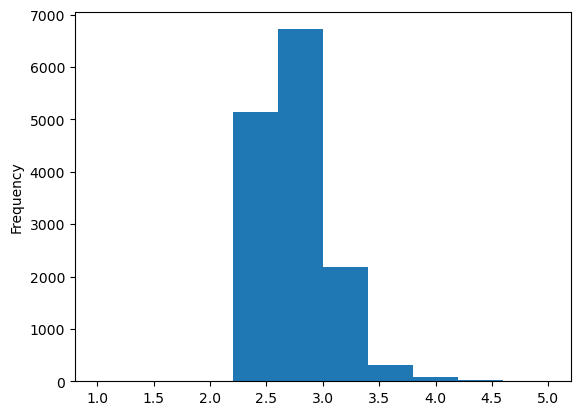

In [20]:
data['ceiling_height'].plot(y='ceiling_height', range=(1, 5), kind='hist');

For the sake of experimentation (and integrity), let's compare the data for apartments and non-apartments:

<Axes: ylabel='Frequency'>

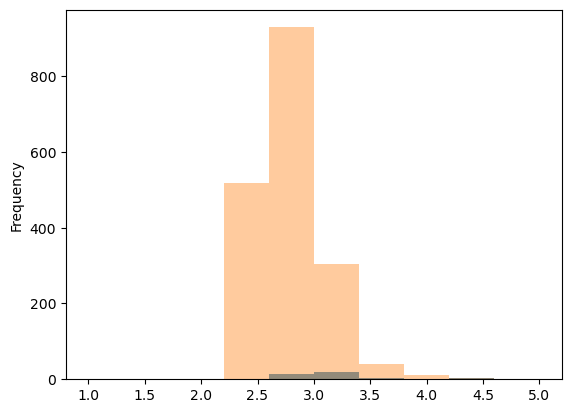

In [21]:
data.loc[data['is_apartment'] == True]['ceiling_height'].plot(y='ceiling_height', range=(1, 5), kind='hist', alpha=0.8)
data.loc[data['is_apartment'] == False]['ceiling_height'].plot(y='ceiling_height', range=(1, 5), kind='hist', alpha=0.4)


Let's check how many rows with missing "is_apartment" values have ceiling heights above 4 meters. To add variety, we'll use the query method:

In [22]:
data.query('(is_apartment.isna()) & (ceiling_height> 4)')['ceiling_height'].count()

43

43 rows out of 23699 do not seem critical. The number is likely to change after dealing with missing values in the "is_apartment" column.

In [23]:
data['ceiling_height'].isnull().sum()

9195

So, here's what we have:

1) There are 9195 missing values in the "ceiling_height" column.

2) From the histograms, we can see that in the majority of the presented data, the ceiling height ranges from 2.5 to 4 meters.

3) There are anomalous values, so when replacing missing values, we can either filter the data for calculating the median or use the median directly. Let's prefer using the median.

Now, finally, we can fill in the missing values in the "ceiling_height" column.

In [24]:
# Fill missing values with the median:
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
#Check:
data['ceiling_height'].isna().sum()

0

We have completed filling in the missing values in the 'ceiling_height' column. We will address anomalies in it later. For now, let's proceed to the missing values in the 'floors_total' column. As a reminder, there were 86 missing values in this column.

In [25]:
data.loc[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12.0,11640000.0,65.2,2018-10-02T00:00:00,2.0,2.65,NaN,30.80,4.0,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4.0,2438033.0,28.1,2016-11-23T00:00:00,1.0,2.65,NaN,20.75,1.0,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4.0,9788348.0,70.8,2015-08-01T00:00:00,2.0,2.65,NaN,38.40,12.0,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4.0,6051191.0,93.6,2017-04-06T00:00:00,3.0,2.65,NaN,47.10,8.0,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5.0,3600000.0,39.0,2017-04-22T00:00:00,1.0,2.65,NaN,NaN,9.0,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5.0,8500000.0,63.5,2017-05-24T00:00:00,2.0,2.80,NaN,NaN,3.0,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4.0,4574160.0,64.5,2017-04-02T00:00:00,2.0,2.65,NaN,31.70,20.0,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0.0,14569263.0,110.4,2016-11-20T00:00:00,3.0,2.65,NaN,45.38,6.0,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0.0,21187872.0,123.3,2017-04-25T00:00:00,3.0,2.65,NaN,50.40,18.0,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Since we will use the 'floors_total' values later to categorize data into "first"/"last"/"other" groups, we cannot fill in the missing values with values from the 'floor' column, as it would affect the results. It also doesn't make sense to fill in the missing values with means, as we did with the 'ceiling_height' column. We have no way to determine which values are missing, so these rows will need to be removed. However, first, let's check how many rows have missing values in both the 'floors_total' and 'is_apartment' columns, and also check the rows where 'is_apartment' == False:

In [26]:
data.loc[(data['floors_total'].isna()) 
         & ((data['is_apartment'].isna())|(data['is_apartment'] == False))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12.0,11640000.0,65.2,2018-10-02T00:00:00,2.0,2.65,NaN,30.80,4.0,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4.0,2438033.0,28.1,2016-11-23T00:00:00,1.0,2.65,NaN,20.75,1.0,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4.0,9788348.0,70.8,2015-08-01T00:00:00,2.0,2.65,NaN,38.40,12.0,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4.0,6051191.0,93.6,2017-04-06T00:00:00,3.0,2.65,NaN,47.10,8.0,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5.0,3600000.0,39.0,2017-04-22T00:00:00,1.0,2.65,NaN,NaN,9.0,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5.0,8500000.0,63.5,2017-05-24T00:00:00,2.0,2.80,NaN,NaN,3.0,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4.0,4574160.0,64.5,2017-04-02T00:00:00,2.0,2.65,NaN,31.70,20.0,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0.0,14569263.0,110.4,2016-11-20T00:00:00,3.0,2.65,NaN,45.38,6.0,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0.0,21187872.0,123.3,2017-04-25T00:00:00,3.0,2.65,NaN,50.40,18.0,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Fortunately, there are no such coincidences, which means we can remove the rows with missing values from the dataset.

In [27]:
data=data.dropna(subset=['floors_total']).reset_index(drop=True)

Let's move on to the missing values in the 'living_area' column.

In [28]:
data['living_area'].isna().sum()

1870

With 1870 missing values, which is approximately 8% of the data, it's not ideal to simply discard them. Let's check the relationship between the 'living_area' and 'is_apartment' columns.

In [29]:
# Display the number of rows where values are missing in the columns'living_area' and
# 'is_apartment,' or where the 'is_apartment' column is False:

data.loc[(data['living_area'].isna()) 
         & ((data['is_apartment'].isna()) | (data['is_apartment'] == False))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0.0,64900000.0,159.00,2015-07-24T00:00:00,3.0,2.65,14.0,NaN,9.0,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5.0,7915000.0,71.60,2019-04-18T00:00:00,2.0,2.65,24.0,NaN,22.0,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12.0,2200000.0,32.80,2018-02-19T00:00:00,1.0,2.65,9.0,NaN,2.0,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10.0,1990000.0,45.80,2017-10-28T00:00:00,2.0,2.50,5.0,NaN,1.0,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13.0,5350000.0,40.00,2018-11-18T00:00:00,1.0,2.65,22.0,NaN,3.0,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23557,14.0,5950000.0,80.30,2018-07-03T00:00:00,3.0,2.70,12.0,NaN,5.0,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23577,12.0,6400000.0,88.00,2018-01-12T00:00:00,4.0,2.55,10.0,NaN,1.0,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23584,9.0,2450000.0,45.60,2018-02-08T00:00:00,1.0,2.80,9.0,NaN,2.0,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23593,0.0,2500000.0,35.00,2017-12-08T00:00:00,1.0,2.65,9.0,NaN,4.0,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [30]:
# Rows with information about apartments where the living area is not specified:

data.loc[(data['living_area'].isna()) &
         (data['is_apartment'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1604,12.0,2150000.0,20.1,2019-01-30T00:00:00,1.0,2.65,9.0,NaN,1.0,True,...,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2752,11.0,7500000.0,152.0,2018-07-27T00:00:00,3.0,3.00,3.0,NaN,1.0,True,...,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
5278,19.0,45000000.0,96.0,2018-11-15T00:00:00,2.0,3.20,6.0,NaN,4.0,True,...,45.0,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,NaN
6329,0.0,11620701.0,122.3,2018-10-01T00:00:00,2.0,2.80,3.0,NaN,3.0,True,...,NaN,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,NaN
6847,14.0,6100000.0,58.0,2018-07-25T00:00:00,2.0,3.10,4.0,NaN,3.0,True,...,NaN,NaN,Санкт-Петербург,45942.0,20802.0,0.0,NaN,1.0,792.0,126.0
14399,4.0,9635328.0,76.8,2018-10-01T00:00:00,1.0,2.80,3.0,NaN,3.0,True,...,NaN,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,30.0
14542,12.0,13490000.0,100.6,2018-07-31T00:00:00,7.0,2.65,4.0,NaN,2.0,True,...,NaN,NaN,Санкт-Петербург,24309.0,3876.0,3.0,574.0,3.0,325.0,50.0
22478,15.0,5500000.0,98.0,2018-12-09T00:00:00,3.0,2.60,8.0,NaN,2.0,True,...,28.0,NaN,Красное Село,27164.0,30589.0,0.0,NaN,0.0,NaN,7.0


The rows are almost entirely filled in, and we can work with this data. In the "total_area" column, there are no missing values. Let's try to fill the NaN values in "living_area" based on the available data. But first, let's ensure that there is a correlation between the columns. Let's calculate the correlation:

In [31]:
# Introduce a new variable and calculate the correlation between the 'living_area' and 'total_area' columns

living_area_to_total_corr = data['living_area'].corr(data['total_area'])
living_area_to_total_corr

0.9399037733870784

The positive correlation suggests that there is a connection between these variables. Similarly, the values in the 'kitchen_area' column may also be related to the total area.

In [32]:
# Introduce a new variable and calculate the correlation between the 'kitchen_area' and 'total_area' columns

kitchen_area_to_total_corr = data['kitchen_area'].corr(data['total_area'])
kitchen_area_to_total_corr

0.6102839097171167

The positive correlation is present, but the coefficient is not very high. It's possible that the layout (studio/open plan) and the presence of a balcony are influencing this. Let's check:

In [33]:
data.loc[(data['kitchen_area'].isna()) &
         (data['studio'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1.0,2450000.0,27.00,2017-03-30T00:00:00,0.0,2.65,24.0,15.50,2.0,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
438,8.0,2480000.0,27.11,2018-03-12T00:00:00,0.0,2.65,17.0,24.75,4.0,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
605,2.0,1850000.0,25.00,2019-02-20T00:00:00,0.0,2.65,10.0,NaN,7.0,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
693,12.0,2500000.0,24.10,2017-12-01T00:00:00,0.0,2.75,25.0,17.50,21.0,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
712,5.0,1500000.0,17.00,2017-06-07T00:00:00,0.0,2.70,9.0,12.00,1.0,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22783,8.0,3090000.0,30.00,2017-12-17T00:00:00,0.0,2.65,25.0,18.20,5.0,NaN,...,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22793,2.0,4280000.0,28.00,2017-10-26T00:00:00,0.0,2.70,19.0,18.00,10.0,NaN,...,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23126,7.0,3200000.0,26.00,2017-09-01T00:00:00,0.0,2.65,25.0,18.00,16.0,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23470,15.0,3350000.0,26.00,2018-09-07T00:00:00,0.0,2.65,19.0,NaN,8.0,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


We obtained 146 rows.

We need to verify:

- The hypothesis that living_area and total_area are approximately equal in studio apartments without balconies.
- The hypothesis that kitchen_area in studio apartments is equal to zero.
- Whether there is a relationship between the floor and the "apartmentness" of the real estate, i.e., the number of units located on floors above the first floor and classified as "apartments" ('is_apartment' == True).

In [34]:
# Create a pivot table for real estate objects: studios without balconies
# with median values of total area and living area

data.loc[data['balcony'] == 0].pivot_table(index='studio',
                                           values=['total_area', 'living_area'], aggfunc='median')

,living_area,total_area
studio,,
False,30.20,52.2
True,18.05,26.0


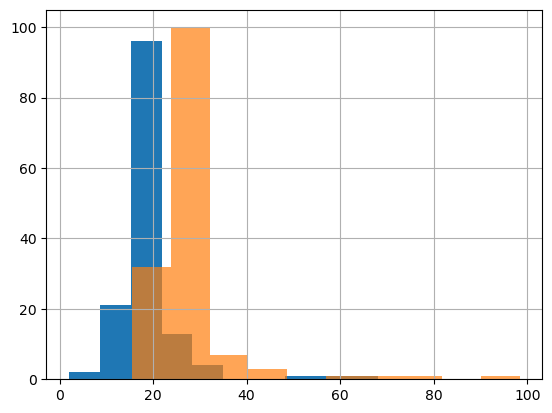

In [35]:
data.loc[data['studio']==True]['living_area'].hist();
data.loc[data['studio']==True]['total_area'].hist(alpha=0.7);

The hypothesis that living_area and total_area are approximately equal in studio apartments has not been confirmed.

Let's check the hypothesis that kitchen_area in studio apartments is either zero or missing.

In [36]:
# Calculate the number of studio apartments in the data:

data.loc[data['studio'] == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1.0,2450000.0,27.00,2017-03-30T00:00:00,0.0,2.65,24.0,15.50,2.0,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
438,8.0,2480000.0,27.11,2018-03-12T00:00:00,0.0,2.65,17.0,24.75,4.0,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
605,2.0,1850000.0,25.00,2019-02-20T00:00:00,0.0,2.65,10.0,NaN,7.0,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
693,12.0,2500000.0,24.10,2017-12-01T00:00:00,0.0,2.75,25.0,17.50,21.0,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
712,5.0,1500000.0,17.00,2017-06-07T00:00:00,0.0,2.70,9.0,12.00,1.0,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22783,8.0,3090000.0,30.00,2017-12-17T00:00:00,0.0,2.65,25.0,18.20,5.0,NaN,...,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22793,2.0,4280000.0,28.00,2017-10-26T00:00:00,0.0,2.70,19.0,18.00,10.0,NaN,...,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23126,7.0,3200000.0,26.00,2017-09-01T00:00:00,0.0,2.65,25.0,18.00,16.0,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23470,15.0,3350000.0,26.00,2018-09-07T00:00:00,0.0,2.65,19.0,NaN,8.0,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [37]:
# Calculate the number of missing values in the 'kitchen_area' column in studio apartments:

data.loc[data['studio'] == True]['kitchen_area'].isna().count()

146

This hypothesis has been confirmed. We can now fill in the missing values in the 'kitchen_area' column for real estate objects where 'studio' == True.

In [38]:
for value in data.loc[data['studio'] == True]:
    data['kitchen_area'] = data['kitchen_area'].fillna(0.0)
    
# Check
data.loc[data['studio']==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1.0,2450000.0,27.00,2017-03-30T00:00:00,0.0,2.65,24.0,15.50,2.0,NaN,...,0.0,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
438,8.0,2480000.0,27.11,2018-03-12T00:00:00,0.0,2.65,17.0,24.75,4.0,NaN,...,0.0,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
605,2.0,1850000.0,25.00,2019-02-20T00:00:00,0.0,2.65,10.0,NaN,7.0,NaN,...,0.0,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
693,12.0,2500000.0,24.10,2017-12-01T00:00:00,0.0,2.75,25.0,17.50,21.0,NaN,...,0.0,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
712,5.0,1500000.0,17.00,2017-06-07T00:00:00,0.0,2.70,9.0,12.00,1.0,NaN,...,0.0,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22783,8.0,3090000.0,30.00,2017-12-17T00:00:00,0.0,2.65,25.0,18.20,5.0,NaN,...,0.0,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22793,2.0,4280000.0,28.00,2017-10-26T00:00:00,0.0,2.70,19.0,18.00,10.0,NaN,...,0.0,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23126,7.0,3200000.0,26.00,2017-09-01T00:00:00,0.0,2.65,25.0,18.00,16.0,NaN,...,0.0,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23470,15.0,3350000.0,26.00,2018-09-07T00:00:00,0.0,2.65,19.0,NaN,8.0,NaN,...,0.0,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


Finally, let's move on to the third hypothesis: check the relationship between the floor and the "apartmentness" of the real estate.

In [39]:
# Display the number of "apartments" on floors above the 1st floor
data.loc[(data['floor'] > 1) & (data['is_apartment'] == True)]['is_apartment'].count()

42

In [40]:
# Display the number of "non-apartments" on floors above the 1st floor

data.loc[(data['floor'] > 1) & (data['is_apartment'] == False)]['is_apartment'].count()

2400

The hypothesis about the relationship between the floor and the "apartmentness" of the real estate has not been confirmed. Let's proceed to fill in the missing values in the 'living_area' and 'kitchen_area' columns with the median values based on the number of rooms.

In [41]:
# Calculate the ratio of living area to total area and kitchen area to total area,
# and store the results in new variables

data['kt_liv_area'] = data['living_area'] / data['total_area']
data['kt_kit_area'] = data['kitchen_area'] / data['total_area']

In [42]:
# Group the data by the number of rooms and calculate the median value

kt_living_median = data.groupby('rooms')['kt_liv_area'].transform('median')
kt_kitchen_median = data.groupby('rooms')['kt_kit_area'].transform('median')

In [43]:
# Replace empty values in the new columns with the median values

data['kt_liv_area'].fillna(kt_living_median, inplace=True)
data['kt_kit_area'].fillna(kt_kitchen_median, inplace=True)

In [44]:
# Replace missing values in the 'living_area' and 'kitchen_area' columns with the calculated values

data['living_area'].fillna(data['kt_liv_area'] * data['total_area'], inplace = True)
data['kitchen_area'].fillna(data['kt_kit_area'] * data['total_area'], inplace = True)
data['kitchen_area'].fillna(0, inplace = True)

In [45]:
# Remove additional columns that were created earlier from the dataframe

data.drop('kt_liv_area', axis=1, inplace=True)
data.drop('kt_kit_area', axis=1, inplace=True)

# Perform a check to ensure that the sum of living area and kitchen area does not exceed the total area
data.query('kitchen_area + living_area > total_area').shape[0]


96

We have obtained 96 values that do not meet the criteria. Due to time constraints, we will proceed to exclude them from the dataset to avoid them affecting the further research.

In [46]:
# Obtain the indices of the rows of interest
idx = data.query('kitchen_area + living_area > total_area').index

# Exclude data from the dataset based on the obtained indices
data.drop(idx, inplace=True)

# Check
data.query('kitchen_area + living_area > total_area')['total_area'].count()

0

Next in the list is the 'is_apartment' column. Let's take another look at how many missing values it has.

In [47]:
data['is_apartment'].isna().sum()

20769

20769 missing values out of 23517 (88%!). Let's build histograms for values where 'is_apartment' == True and 'is_apartment' == False to check if there are any noticeable patterns that can clearly classify a property as an apartment.

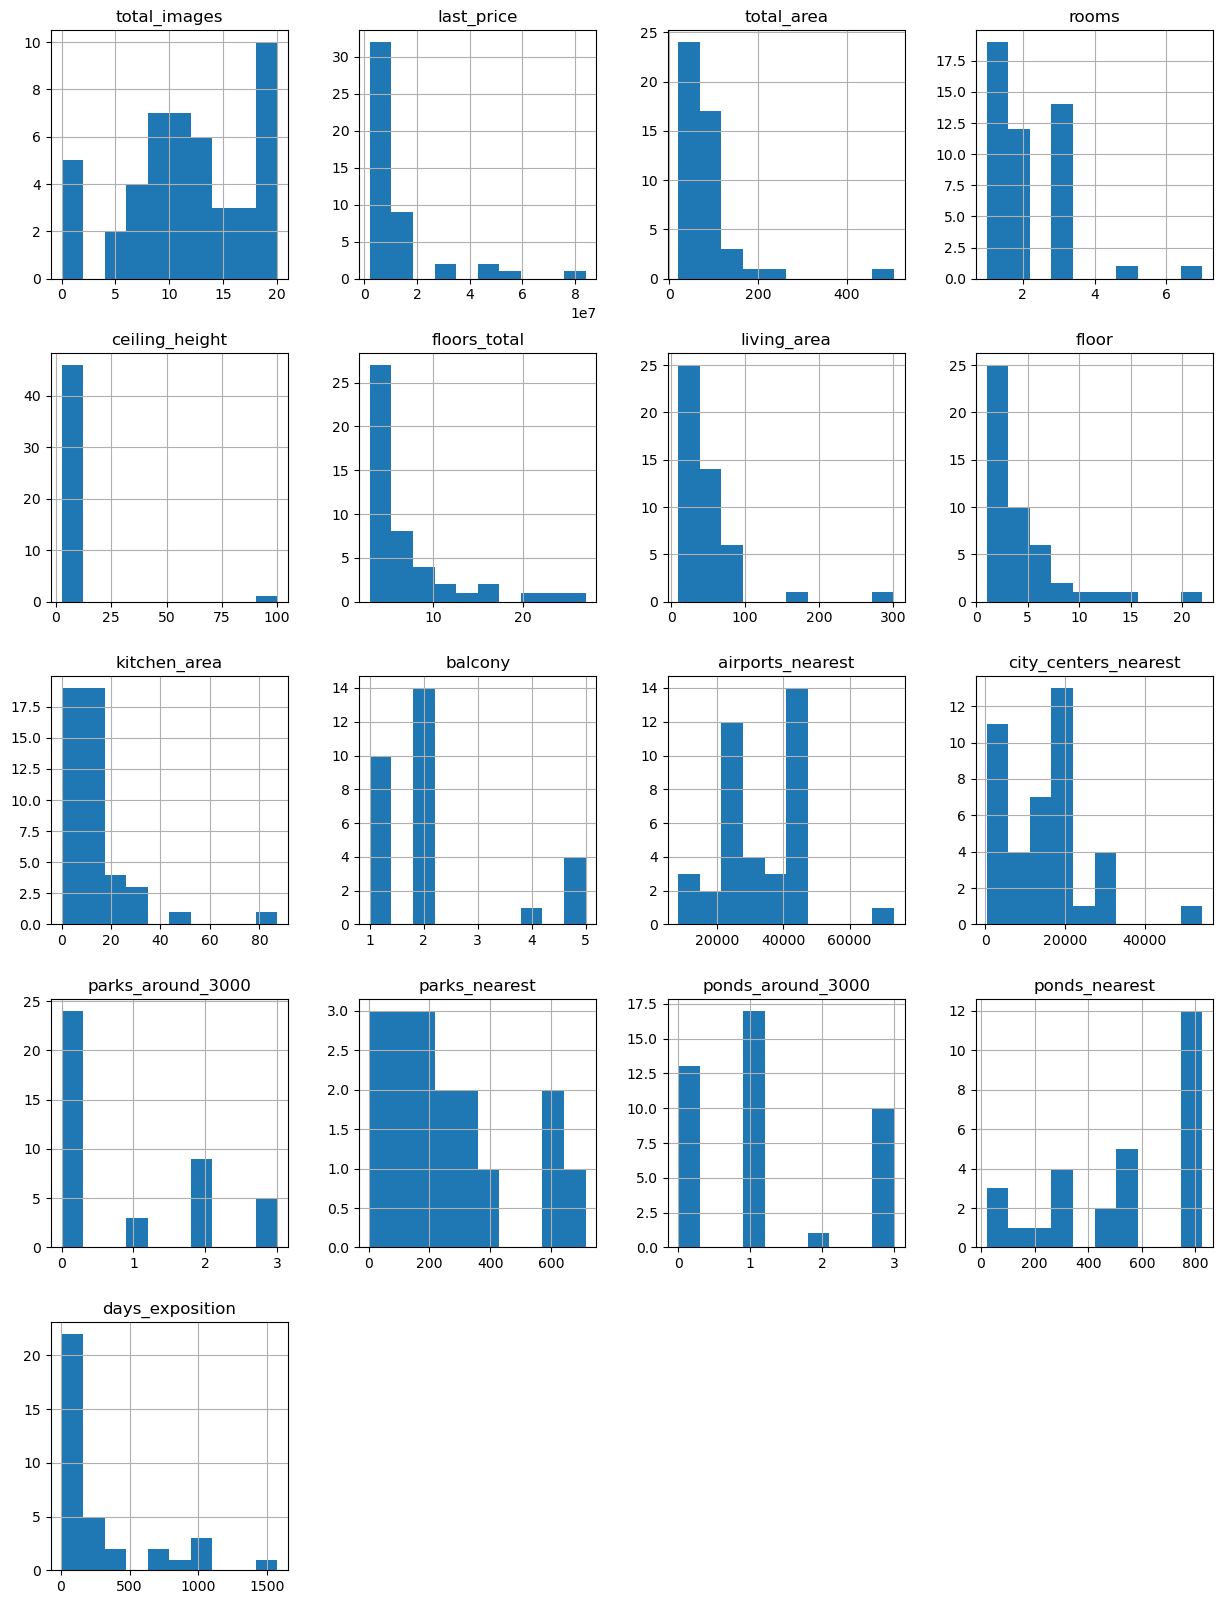

In [48]:
data.query('is_apartment == True').hist(figsize=(15,20));

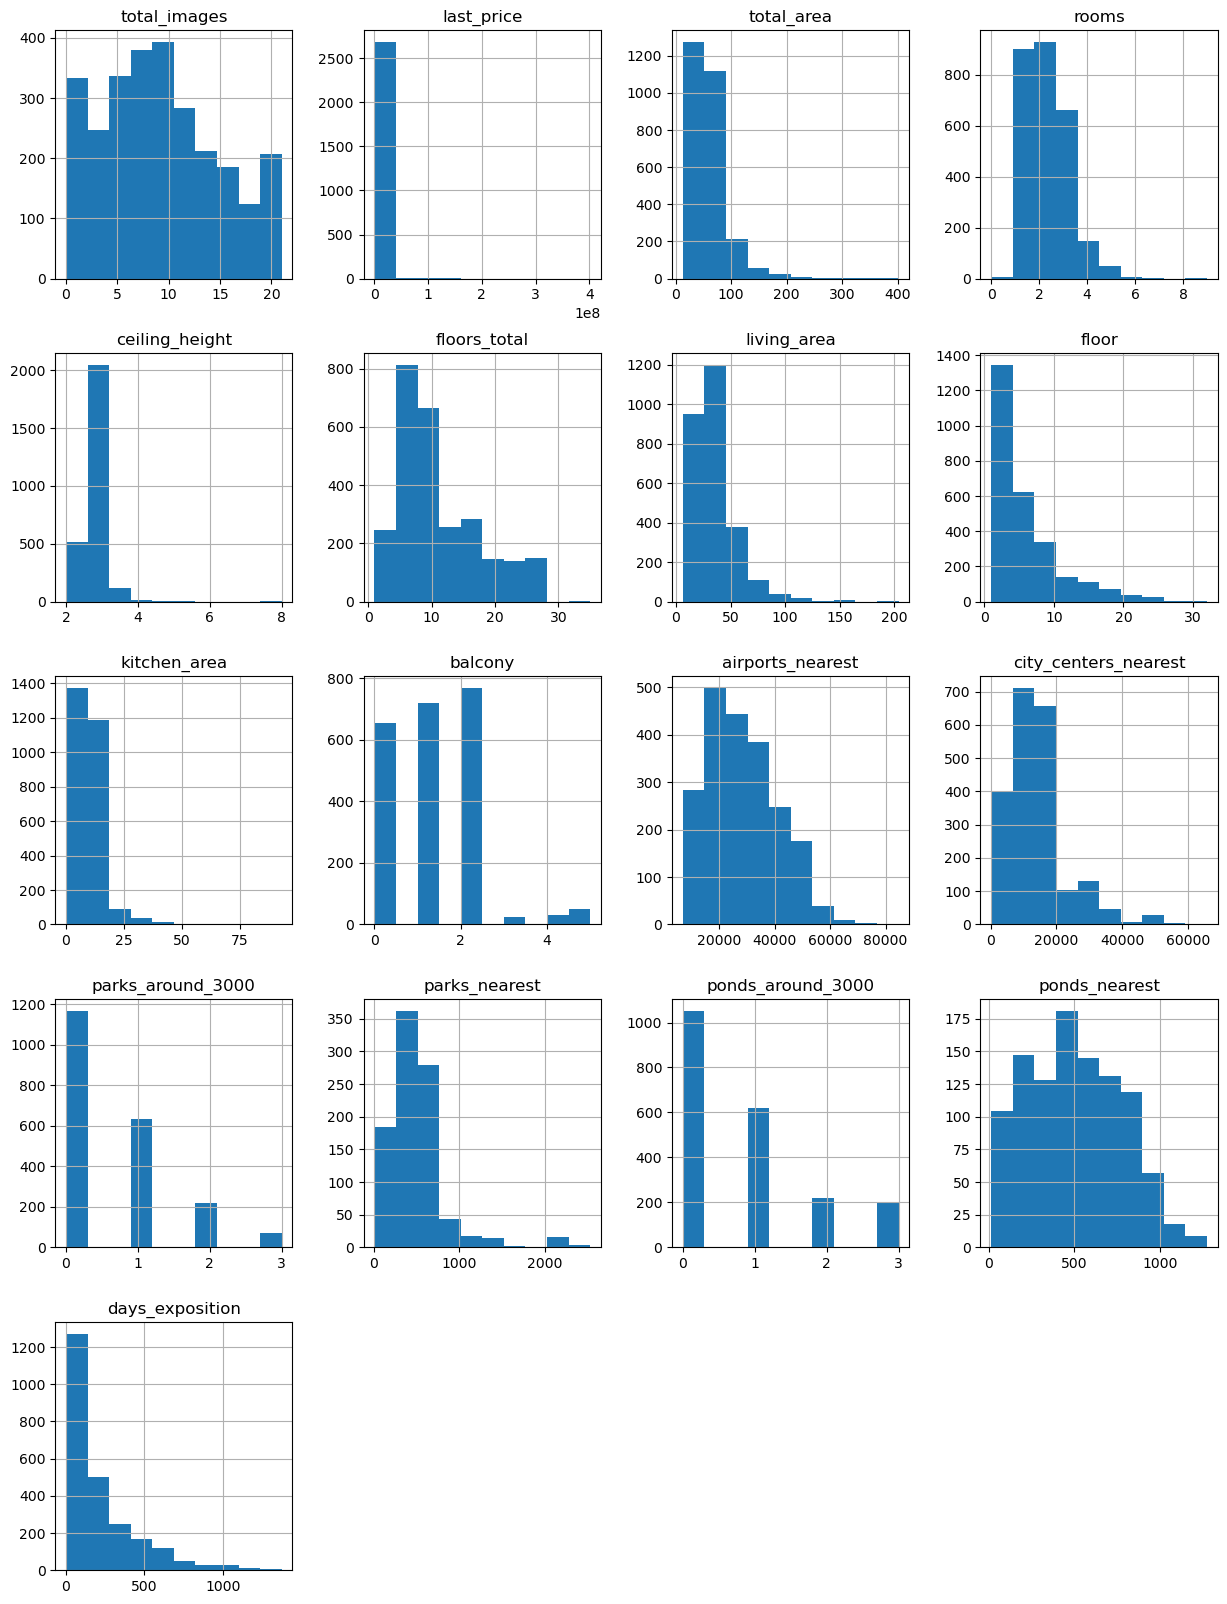

In [49]:
data.query('is_apartment == False').hist(figsize=(15,20));

No obvious relationships were observed. Due to time constraints and the fact that the 'is_apartment' column will not be used in the further analysis of this dataset, it can be safely excluded from the dataset.

In [50]:
data.drop('is_apartment', axis=1, inplace=True)

Moving on to the 'balcony' column. Based on the assumption that missing values in this column most likely indicate the absence of balconies, let's fill in the missing values with zeros.

In [51]:
data['balcony'] = data['balcony'].fillna(0)

# Check
data['balcony'].isna().sum()

0

Next, let's examine the missing values in the 'locality_name' column.

In [52]:
data.query('locality_name.isna() == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1093,3.0,8600000.0,81.70,2016-04-15T00:00:00,3.0,3.55,5.0,50.800000,2.0,False,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2027,6.0,5398000.0,80.00,2017-05-30T00:00:00,3.0,2.65,4.0,42.600000,2.0,False,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2596,20.0,3351765.0,42.70,2015-09-20T00:00:00,1.0,2.65,24.0,15.600000,3.0,False,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2625,2.0,5130593.0,62.40,2015-10-11T00:00:00,2.0,2.65,24.0,33.100000,21.0,False,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3563,10.0,4200000.0,46.50,2016-05-28T00:00:00,2.0,2.65,5.0,30.800000,5.0,False,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4137,17.0,17600000.0,89.50,2014-12-09T00:00:00,2.0,3.00,8.0,39.620000,7.0,False,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4175,7.0,9200000.0,80.00,2015-12-10T00:00:00,3.0,4.00,4.0,52.300000,3.0,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4655,1.0,5500000.0,83.00,2015-08-14T00:00:00,3.0,2.65,7.0,52.442122,6.0,False,...,0.00,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5324,19.0,13540000.0,85.50,2016-01-20T00:00:00,3.0,2.65,7.0,59.100000,5.0,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5688,7.0,3700000.0,30.00,2016-04-29T00:00:00,1.0,2.65,24.0,20.000000,23.0,False,...,0.00,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Missing values in the 'locality_name' column can potentially be restored using data from the 'airports_nearest' and 'city_сenters_nearest' columns. Let's exclude the rows from the dataset where both the locality name and the distances to the airport and city center are missing.

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23517 entries, 0 to 23612
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23517 non-null  float64
 1   last_price            23517 non-null  float64
 2   total_area            23517 non-null  float64
 3   first_day_exposition  23517 non-null  object 
 4   rooms                 23517 non-null  float64
 5   ceiling_height        23517 non-null  float64
 6   floors_total          23517 non-null  float64
 7   living_area           23517 non-null  float64
 8   floor                 23517 non-null  float64
 9   studio                23517 non-null  object 
 10  open_plan             23517 non-null  object 
 11  kitchen_area          23517 non-null  float64
 12  balcony               23517 non-null  float64
 13  locality_name         23469 non-null  object 
 14  airports_nearest      18017 non-null  float64
 15  city_centers_neares

In [55]:
idx = data.loc[(data['locality_name'].isna()==True)&(
    data['airports_nearest'].isna()==True)&(
    data['city_centers_nearest'].isna()==True)].index

data.drop(idx, inplace=True)

In [57]:
# Group the data by locality name, nearest airport, and distance to the city center

data.pivot_table(
    index='locality_name', values=['airports_nearest', 'city_centers_nearest'], aggfunc=['min', 'max'])

min                       \
                        airports_nearest city_centers_nearest   
locality_name                                                   
Зеленогорск                      70016.0              51115.0   
Колпино                          23649.0              29436.0   
Красное Село                     23892.0              27317.0   
Кронштадт                        64931.0              46657.0   
Ломоносов                        46502.0              36816.0   
Павловск                         19380.0              31533.0   
Петергоф                         34626.0              29815.0   
Пушкин                           12157.0              24311.0   
Санкт-Петербург                      0.0                181.0   
Сестрорецк                       50031.0              31130.0   
поселок Лисий Нос                55930.0              28246.0   
посёлок Александровская          12781.0              27352.0   
посёлок Белоостров               57769.0              38868.0   
посёлок Левашово                 52693.0              25727.0   
посёлок Лисий Нос                54068.0              26368.0   
посёлок Металлострой             24629.0              26696.0   
посёлок Молодёжное               83758.0              64857.0   
посёлок Парголово                44346.0              17994.0   
посёлок Песочный                 52504.0              25867.0   
посёлок Петро-Славянка           20605.0              27165.0   
посёлок Понтонный                28997.0              30709.0   
посёлок Репино                   61451.0              42550.0   
посёлок Сапёрный                 34110.0              35822.0   
посёлок Стрельна                 26770.0              21813.0   
посёлок Усть-Ижора               26500.0              28212.0   
посёлок Шушары                    9294.0              17012.0   

                                     max                       
                        airports_nearest city_centers_nearest  
locality_name                                                  
Зеленогорск                      81607.0              62706.0  
Колпино                          31691.0              37477.0  
Красное Село                     38367.0              41792.0  
Кронштадт                        69785.0              51511.0  
Ломоносов                        56896.0              61495.0  
Павловск                         24291.0              36445.0  
Петергоф                         46535.0              49574.0  
Пушкин                           21055.0              35610.0  
Санкт-Петербург                  54784.0              29493.0  
Сестрорецк                       61872.0              42971.0  
поселок Лисий Нос                55930.0              28246.0  
посёлок Александровская          13012.0              27584.0  
посёлок Белоостров               57769.0              38868.0  
посёлок Левашово                 52693.0              25727.0  
посёлок Лисий Нос                55909.0              28226.0  
посёлок Металлострой             26729.0              29217.0  
посёлок Молодёжное               84869.0              65968.0  
посёлок Парголово                61748.0              24415.0  
посёлок Песочный                 56095.0              27835.0  
посёлок Петро-Славянка           20605.0              27165.0  
посёлок Понтонный                32141.0              33853.0  
посёлок Репино                   64127.0              45226.0  
посёлок Сапёрный                 34180.0              35892.0  
посёлок Стрельна                 28945.0              24134.0  
посёлок Усть-Ижора               26521.0              28233.0  
посёлок Шушары                   26293.0              32079.0

In the obtained table, there are at least two errors:

1) The minimum distance to the airport in St. Petersburg is listed as 0.

2) Duplicate value for the settlement "Lisiy Nos."

Let's correct these issues.

In [58]:
# Display the rows where the distance to the airport in St. Petersburg is 0

data.query('locality_name == "Санкт-Петербург" & airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21007,0.0,7000000.0,34.7,2018-09-23T00:00:00,1.0,2.7,9.0,19.8,3.0,False,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Fortunately, there is only one such row. Let's exclude it.

In [59]:
data.drop(21085, inplace=True)

In [60]:
# Replace the value 
data.loc[(data.locality_name == "поселок Лисий Нос"), 'locality_name'] = "посёлок Лисий Нос"

# Check
data.query('locality_name == "поселок Лисий Нос"')['locality_name'].count()

0

In [61]:
# Group the data again by locality name, nearest airport, and distance to the city center

data.pivot_table(
    index='locality_name', values=['airports_nearest', 'city_сenters_nearest'], aggfunc=['min', 'max'])

KeyError: 'city_сenters_nearest'

Let's use histograms to check which values in the 'airports_nearest' and 'city_сenters_nearest' columns are most common in rows with missing values in the 'locality_name' column.

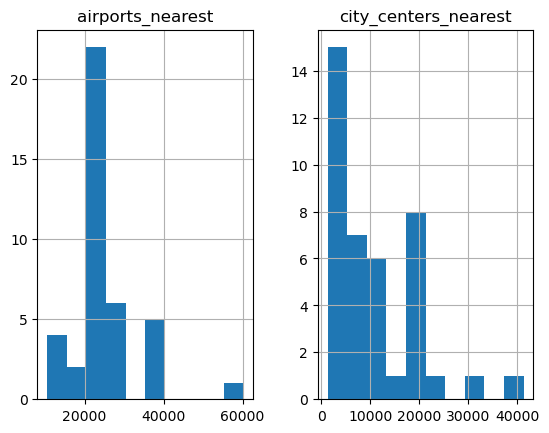

In [63]:
# Define the indices to create a pivot table for the histogram

idx = data.loc[data['locality_name'].isna() == True].index

data.loc[data['locality_name'].isna()==True].pivot_table(
    index= idx, values=['airports_nearest','city_centers_nearest'], aggfunc='first').hist();

Looking at the resulting histograms, we can conclude that the values in the 'airports_nearest' column for rows with missing locality names are distributed in the ranges of 10-30, 35-40, and 55-60 thousand (let's consider the range from 10,000 to 60,000), and the corresponding values in the 'city_сenters_nearest' column fall in the range of 0-40,000.

Let's display the names of localities that fall into these specified ranges:

In [64]:
data.loc[(data['airports_nearest']>= 10000) & (
    data['airports_nearest']<= 60000) & (data['city_centers_nearest']<= 40000)].pivot_table(
    index='locality_name', values=['airports_nearest', 'city_centers_nearest'], aggfunc=['min', 'max'])

min                       \
                        airports_nearest city_centers_nearest   
locality_name                                                   
Колпино                          23649.0              29436.0   
Красное Село                     23892.0              27317.0   
Ломоносов                        48562.0              36816.0   
Павловск                         19380.0              31533.0   
Петергоф                         34626.0              29815.0   
Пушкин                           12157.0              24311.0   
Санкт-Петербург                  10000.0                181.0   
Сестрорецк                       50031.0              31130.0   
посёлок Александровская          12781.0              27352.0   
посёлок Белоостров               57769.0              38868.0   
посёлок Левашово                 52693.0              25727.0   
посёлок Лисий Нос                54068.0              26368.0   
посёлок Металлострой             24629.0              26696.0   
посёлок Парголово                44346.0              17994.0   
посёлок Песочный                 52504.0              25867.0   
посёлок Петро-Славянка           20605.0              27165.0   
посёлок Понтонный                28997.0              30709.0   
посёлок Сапёрный                 34110.0              35822.0   
посёлок Стрельна                 26770.0              21813.0   
посёлок Усть-Ижора               26500.0              28212.0   
посёлок Шушары                   10031.0              17012.0   

                                     max                       
                        airports_nearest city_centers_nearest  
locality_name                                                  
Колпино                          31691.0              37477.0  
Красное Село                     29062.0              32487.0  
Ломоносов                        48717.0              37241.0  
Павловск                         24291.0              36445.0  
Петергоф                         46535.0              39936.0  
Пушкин                           21055.0              35610.0  
Санкт-Петербург                  54784.0              29493.0  
Сестрорецк                       59705.0              36635.0  
посёлок Александровская          13012.0              27584.0  
посёлок Белоостров               57769.0              38868.0  
посёлок Левашово                 52693.0              25727.0  
посёлок Лисий Нос                55930.0              28246.0  
посёлок Металлострой             26729.0              29217.0  
посёлок Парголово                55854.0              24415.0  
посёлок Песочный                 56095.0              27835.0  
посёлок Петро-Славянка           20605.0              27165.0  
посёлок Понтонный                32141.0              33853.0  
посёлок Сапёрный                 34180.0              35892.0  
посёлок Стрельна                 28945.0              24134.0  
посёлок Усть-Ижора               26521.0              28233.0  
посёлок Шушары                   26293.0              32079.0

The list has been reduced, albeit insignificantly. Let's start filling in the missing values. There is probably a way to do this in a few lines of elegant code, and as soon as I discover it, I will definitely use it. For now, I'll have to go through it manually.

In [65]:
def return_locality(airport, center):
    if (airport in range(23649, 31691)) & (center in range(29436, 37477)):
        return ('Колпино')
    elif (airport in range(23892, 29062)) & (center in range(27317, 32487)):
        return('Красное село')
    elif (airport in range(48562, 48717)) & (center in range(36816, 37241)):
        return('Ломоносов')
    elif (airport in range(19380, 24291)) & (center in range(31533, 36445)):
        return('Павловск')
    elif (airport in range(34626, 46535)) & (center in range(29815, 39936)):
        return('Петергоф')
    elif (airport in range(12157, 21055)) & (center in range(24311, 35610)):
        return('Пушкин')
    elif (airport in range(10000, 54784)) & (center in range(181, 29493)):
        return('Санкт-Петербург')
    elif (airport in range(50031, 59705)) & (center in range(31130, 36635)):
        return('Сестрорецк')
    elif (airport in range(12781, 13012)) & (center in range(27352, 27584)):
        return('посёлок Александровская')
    elif (airport in range(57769, 57769)) & (center in range(38868, 38868)):
        return('посёлок Белоостров')
    elif (airport in range(52693, 52693)) & (center in range(25727, 25727)):
        return('посёлок Левашово')
    elif (airport in range(54068, 55930)) & (center in range(26368, 28246)):
        return('посёлок Лисий Нос')
    elif (airport in range(24629, 26729)) & (center in range(26696, 29217)):
        return('посёлок Металлострой')
    elif (airport in range(44346, 55854)) & (center in range(17994, 24415)):
        return('посёлок Парголово')
    elif (airport in range(52504, 56095)) & (center in range(25867, 27835)):
        return('посёлок Песочный')
    elif (airport in range(20605, 20605)) & (center in range(27165, 27165)):
        return('посёлок Петро-Славянка')
    elif (airport in range(28997, 32141)) & (center in range(30709, 33853)):
        return('посёлок Понтонный')
    elif (airport in range(34110, 34180)) & (center in range(35822, 35892)):
        return('посёлок Сапёрный')
    elif (airport in range(26770, 28945)) & (center in range(21813, 24134)):
        return('посёлок Стрельна')
    elif (airport in range(26500, 26521)) & (center in range(28212, 28233)):
        return('посёлок Усть-Ижора')
    elif (airport in range(10031, 26293)) & (center in range(17012, 32079)):
        return('посёлок Шушары')
    else:
        return ('Совпадений не найдено')

In [66]:
#data.loc[data['locality_name'].isna()==True]['airports_nearest']

#data.loc[data['locality_name'].isna()==True]['city_сenters_nearest']

airport = [23478.0, 22041.0, 22041.0, 27419.0, 25054.0, 21774.0, 26534.0, 10556.0, 21460.0, 22041.0, 14031.0, 25925.0, 37123.0, 24233.0, 24953.0, 25771.0, 25221.0, 37123.0, 25680.0, 22041.0, 20234.0, 22041.0, 35920.0, 36380.0, 22041.0, 21731.0, 21219.0, 36865.0, 11206.0, 21540.0, 21654.0, 22041.0, 23478.0, 24385.0, 19744.0, 60195.0, 26090.0, 23297.0, 22041.0, 11206.0]

center = [4258.0, 17369.0, 17369.0, 8127.0, 3902.0, 3039.0, 5382.0, 9538.0, 16788.0, 17369.0, 8582.0, 4627.0, 12332.0, 4065.0, 3801.0, 4474.0, 4069.0, 12332.0, 4383.0, 17369.0, 23659.0, 17369.0, 9633.0, 9497.0, 17369.0, 8619.0, 1322.0, 10976.0, 8943.0, 8429.0, 3312.0, 17369.0, 4258.0, 4604.0, 31897.0, 41294.0, 4805.0, 1780.0, 17369.0, 8943.0]

Almost all data on the distance to the airport and city center from rows with missing locality names fit within the ranges corresponding to St. Petersburg:

airport_nearest (10,000-54,784)
city_center_nearest (181-29,493)
Except for (19,744.0, 31,897.0) and (60,195.0, 41,294.0). We can handle it even without the return_locality(airport, center) function, but since it's written, let's use it to determine the locality names.

In [67]:
# 21119
return_locality(19744.0, 31897.0)

'Павловск'

In [68]:
#21276
return_locality(60195.0, 41294.0)

'Совпадений не найдено'

Let's fill in the gaps. We will replace the value in row with index 21119 with 'Pavlovsk', delete row 21276, and fill the rest with "Saint Petersburg".

In [69]:
data['locality_name'] = np.where((data.airports_nearest == 19744.0), 'Павловск', data.locality_name)
data.drop(21276, inplace=True)
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербург')
#data['locality_name'].isna().sum()

We will fill in the missing data in the columns 'airports_nearest,' 'city_centers_nearest,' 'parks_nearest,' and 'ponds_nearest' with the median value based on the name of the locality.

We will fill in the missing data in the columns 'parks_around_3000' and 'ponds_around_3000' with 0, assuming that the absence of values indicates the absence of parks and ponds, respectively.

In [73]:
# 'airports_nearest'
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))

# 'city_сenters_nearest'
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data.groupby('locality_name')['city_centers_nearest'].transform('median'))

In [74]:
# 'parks_around_3000'
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
# 'parks_nearest'
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('median'))
# 'ponds_around_3000'
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
#ponds_nearest
data['ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('median'))

And finally, the missing values in 'days_exposition.' Considering that the data was not downloaded today, we need to approximately determine the latest date an ad was posted, add the maximum number of days an ad was viewed to it, and subtract the date the ad for the object we are interested in was posted.

In [75]:
# Let's convert the 'first_day_exposition' column to datetime format:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S' 
)
# Check
#data['first_day_exposition'].head()

Let's display a diagram showing the distribution of missing values in the 'days_exposition' column by the publication year of the ads:

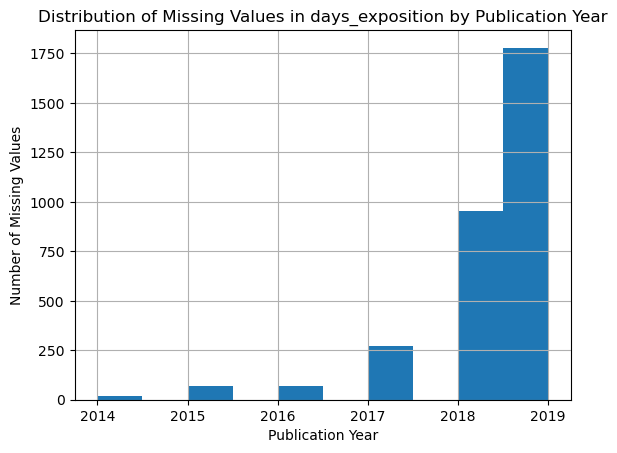

In [76]:
missing_days_exposition = data[data['days_exposition'].isna()]['first_day_exposition'].dt.year
missing_days_exposition.hist()

plt.xlabel('Publication Year')
plt.ylabel('Number of Missing Values')
plt.title('Distribution of Missing Values in days_exposition by Publication Year')
plt.show()


From the resulting distribution diagram, we can see that the majority of missing values in the 'days_exposition' column were in 2018 and 2019. This suggests that most likely, at the time the dataset was extracted, these real estate properties had not yet been sold. The current status of these properties is unknown. Therefore, I suggest leaving the missing values for the last two years unchanged. For the missing values in previous years, we can replace them with the average values of property selling times for each respective year.

In [77]:
# Calculate the median value of real estate sales velocity for the year 2014:
days_exposition_median_per_year = data.query(
    'first_day_exposition.dt.year == 2014 and days_exposition.isna() == False')['days_exposition'].median()

#days_exposition_median_per_year

data.loc[(data['days_exposition'].isna()==True) & (
    data['first_day_exposition'].dt.year == 2014)] = data.loc[(data['days_exposition'].isna()==True) & (
    data['first_day_exposition'].dt.year == 2014)].fillna(days_exposition_median_per_year)

In [78]:
# Calculate the median value of real estate sales velocity for the year 2015:
days_exposition_median_per_year = data.query(
    'first_day_exposition.dt.year == 2015 and days_exposition.isna() == False')['days_exposition'].median()

# Apply the calculated median to fill missing values for 2015:
data.loc[(data['days_exposition'].isna() == True) & (
    data['first_day_exposition'].dt.year == 2015)] = data.loc[(data['days_exposition'].isna() == True) & (
    data['first_day_exposition'].dt.year == 2015)].fillna(days_exposition_median_per_year)


In [79]:
# Calculate the median value of real estate sales velocity for the year 2016:
days_exposition_median_per_year = data.query(
    'first_day_exposition.dt.year == 2016 and days_exposition.isna() == False')['days_exposition'].median()

# Apply the calculated median to fill missing values for 2016:
data.loc[(data['days_exposition'].isna() == True) & (
    data['first_day_exposition'].dt.year == 2016)] = data.loc[(data['days_exposition'].isna() == True) & (
    data['first_day_exposition'].dt.year == 2016)].fillna(days_exposition_median_per_year)


In [80]:
# Calculate the median value of real estate sales velocity for the year 2017:
days_exposition_median_per_year = data.query(
    'first_day_exposition.dt.year == 2017 and days_exposition.isna() == False')['days_exposition'].median()

# Apply the calculated median to fill missing values for 2017:
data.loc[(data['days_exposition'].isna() == True) & (
    data['first_day_exposition'].dt.year == 2017)] = data.loc[(data['days_exposition'].isna() == True) & (
    data['first_day_exposition'].dt.year == 2017)].fillna(days_exposition_median_per_year)


In [81]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5299
city_centers_nearest    5299
parks_around_3000          0
parks_nearest           5848
ponds_around_3000          0
ponds_nearest           5382
days_exposition         2731
dtype: int64

Unfilled gaps in 'airports_nearest', 'city_centers_nearest', 'parks_nearest', and 'ponds_nearest' indicate that there is no data available for these populated areas in the dataframe. We choose not to replace NaN with 'None' to avoid converting data types in the columns to "object," as we intend to use them in subsequent calculations. We will leave them as is.

## Duplicates

In [82]:
# Check for explicit duplicates:
duplicates_count = data.duplicated().sum()

In [83]:
# Check for implicit duplicates:
pd.set_option('display.max_rows', None)  # A command that allows displaying all columns of the table
data['locality_name'].value_counts()

Санкт-Петербург                                            15632
посёлок Мурино                                               515
посёлок Шушары                                               437
Всеволожск                                                   395
Пушкин                                                       369
Колпино                                                      337
посёлок Парголово                                            326
Гатчина                                                      301
деревня Кудрово                                              299
Выборг                                                       235
Петергоф                                                     200
Сестрорецк                                                   182
Красное Село                                                 176
Кудрово                                                      171
деревня Новое Девяткино                                      143
Сертолово                

In [84]:
# Replace "поселок" with "посёлок"

data['locality_name'] = data['locality_name'].replace(
    {'поселок': 'посёлок',
     'городской посёлок': 'посёлок городского типа'}, regex=True)


After checking questionable values on Google, it has been decided to make the following replacements:

Мурино: Change to "посёлок Мурино"
Кудрово: Change to "деревня Кудрово"
Никольский: Change to "Никольское"
село Никольское: Change to "Никольское"
посёлок городского типа Никольский: Change to "Никольское"
Садовое товарищество Рахья: Change to "посёлок городского типа Рахья"
посёлок Гарболово: Change to "деревня Гарболово"
посёлок городского типа: Change to "село Павлово"
садовое товарищество Приладожский: Change to "посёлок городского типа Приладожский"
деревня Фёдоровское: Change to "посёлок городского типа Фёдоровское"

Коммунар and Коммунары are different localities and will not be changed.

In [85]:
data['locality_name'] = data['locality_name'].replace(
    {'Мурино' : 'посёлок Мурино', 'Кудрово' : 'деревня Кудрово',
     'Никольский': 'Никольское', 'село Никольское': 'Никольское',
    'посёлок городского типа Никольский': 'Никольское',
    'Садовое товарищество Рахья': 'посёлок городского типа Рахья',
    'посёлок Гарболово' : 'деревня Гарболово',
    'посёлок городского типа': 'село Павлово',
    'садовое товарищество Приладожский' : 'посёлок городского типа Приладожский',
    'деревня Фёдоровское' : 'посёлок городского типа Фёдоровское'}, regex=True)

#data['locality_name'].value_counts()

## Convert datatypes

In [86]:
data = data.astype({'total_images': 'Int32', 'rooms': 'Int32', 'floors_total': 'Int32',
             'floor': 'Int32', 'balcony': 'Int32', 'parks_around_3000': 'Int32',
             'ponds_around_3000' : 'Int32', 'last_price' : 'Int32', 'studio' : 'bool', 'open_plan' : 'bool'})

## Anomalous values

In [87]:
#'last_price'
(data['last_price']/1000000).describe()

count      23507.0
mean      6.541969
std      10.916551
min        0.01219
25%         3.4105
50%           4.65
75%            6.8
max          763.0
Name: last_price, dtype: Float64

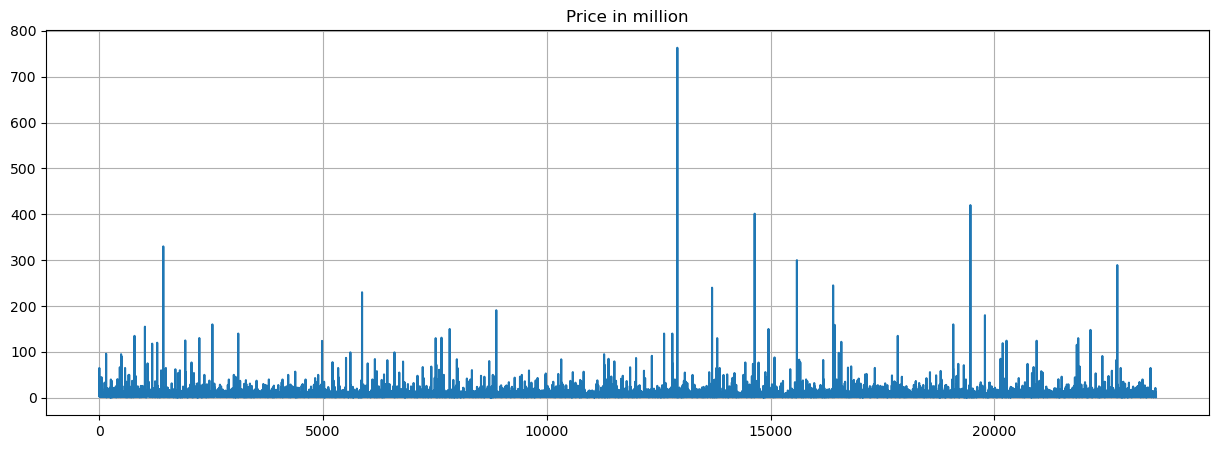

In [88]:
(data['last_price']/1000000).plot(y=(data['last_price']/1000000), title='Price in million', grid=True, figsize=(15,5));

(0.0, 20.0)

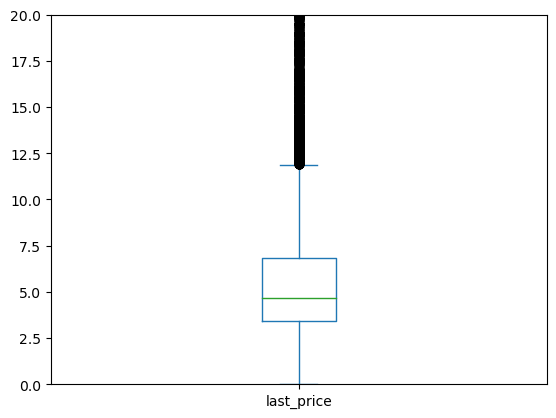

In [89]:
(data['last_price']/1000000).plot(kind="box")
plt.ylim(0, 20)

The data has a considerable spread, ranging from 12,000 to 763 million rubles. The majority of values fall within the range of up to 5 million rubles. The lower 'whisker' reaches 0, which is the minimum value. The upper whisker ends at around 12 million rubles. This is an approximate boundary of the normal range. Anything beyond this boundary is considered an outlier. We will exclude these values from the dataset.

In [90]:
idx = data.loc[data['last_price'] > 12500000].index
#idx
data.drop(idx, inplace=True)

In [91]:
#'total_area'
(data['total_area']).describe()

count    21707.000000
mean        53.775199
std         19.722366
min         12.000000
25%         39.000000
50%         50.000000
75%         64.000000
max        255.000000
Name: total_area, dtype: float64

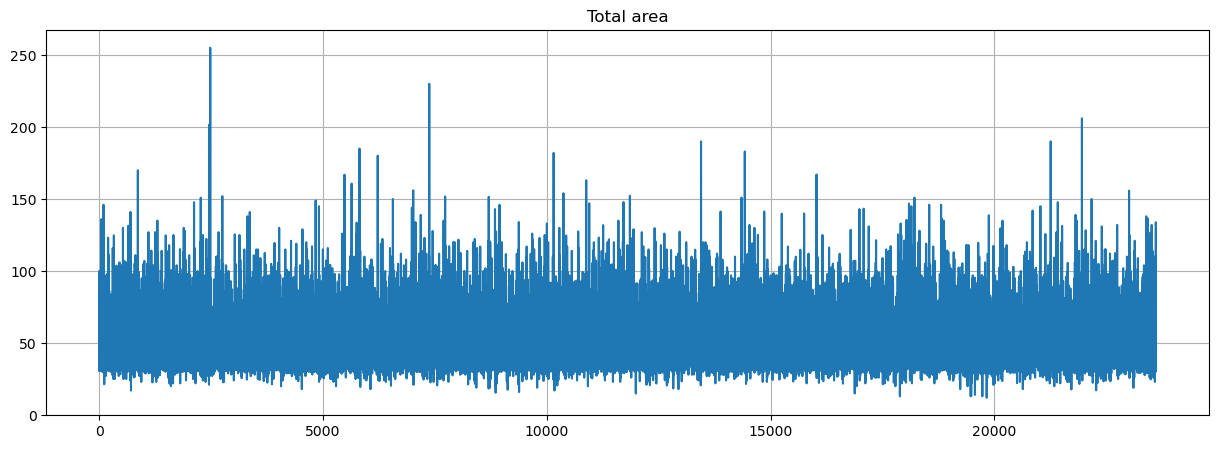

In [92]:
(data['total_area']).plot(y=(data['total_area']), title='Total area', grid=True, figsize=(15,5));

(10.0, 110.0)

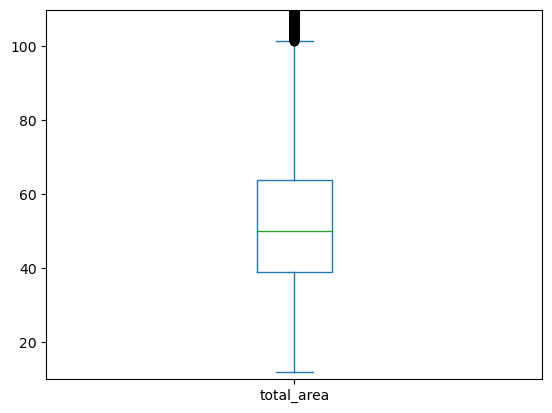

In [93]:
(data['total_area']).plot(kind="box")
plt.ylim(10, 110)

The majority of values fall within the range of 12 to 110 square meters. Let's remove values that are above the upper "whisker":

In [94]:
idx = data.loc[data['total_area'] > 110].index
data.drop(idx, inplace=True)

In [95]:
#'rooms'
(data['rooms']).describe()

count     21406.0
mean     1.914977
std      0.886222
min           0.0
25%           1.0
50%           2.0
75%           3.0
max           6.0
Name: rooms, dtype: Float64

Values from 0 to 6 rooms are considered reasonable and do not require any further processing.

In [96]:
#ceiling_height'

(data['ceiling_height']).describe()

count    21406.000000
mean         2.673590
std          0.217499
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

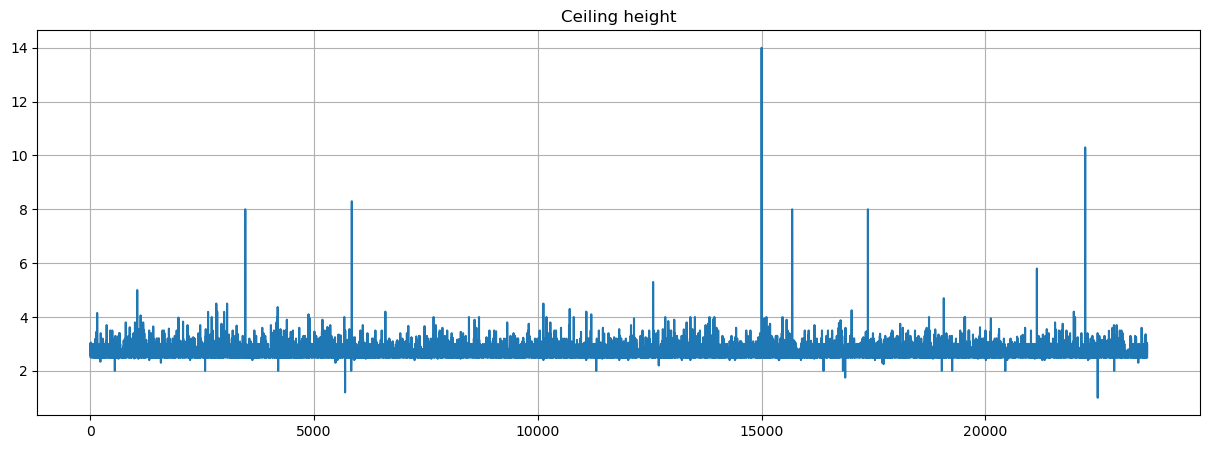

In [97]:
(data['ceiling_height']).plot(y=(data['ceiling_height']), title='Ceiling height', grid=True, figsize=(15,5));

(2.2, 3.0)

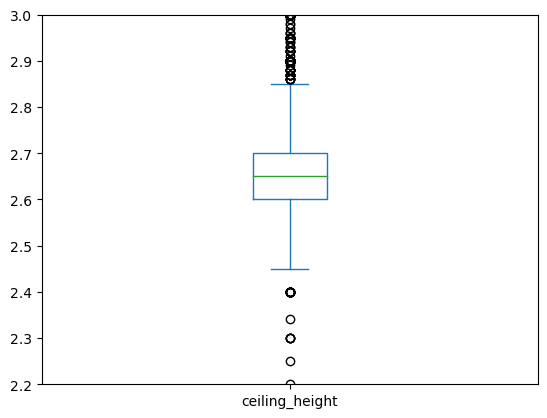

In [98]:
(data['ceiling_height']).plot(kind="box")
plt.ylim(2.2, 3)

In [99]:
idx = data.loc[data['ceiling_height'] < 2.45].index
data.drop(idx, inplace=True)

idx = idx = data.loc[data['ceiling_height'] > 2.85].index
data.drop(idx, inplace=True)

In [100]:
#'floors_total'

(data['floors_total']).describe()

count      19490.0
mean     11.198461
std       6.663305
min            1.0
25%            5.0
50%            9.0
75%           16.0
max           52.0
Name: floors_total, dtype: Float64

Considering the fact that the tallest residential building in St. Petersburg today is the "Knyaz Alexander Nevsky," which has 37 floors (including two underground floors), it is advisable to exclude values that appear suspiciously high in the dataset (the maximum value in the dataset being 52 floors).

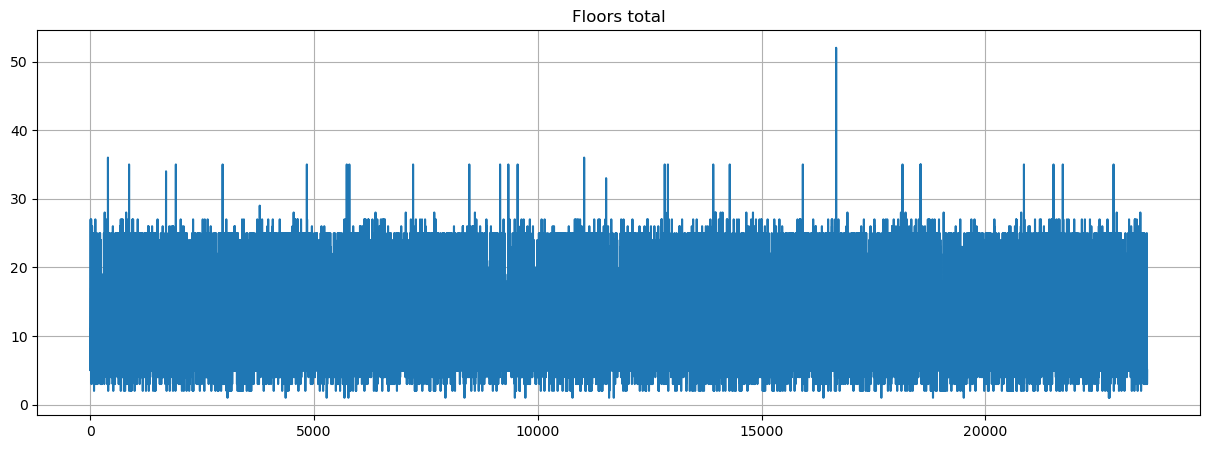

In [101]:
(data['floors_total']).plot(y=(data['floors_total']), title='Floors total', grid=True, figsize=(15,5));

(1.0, 30.0)

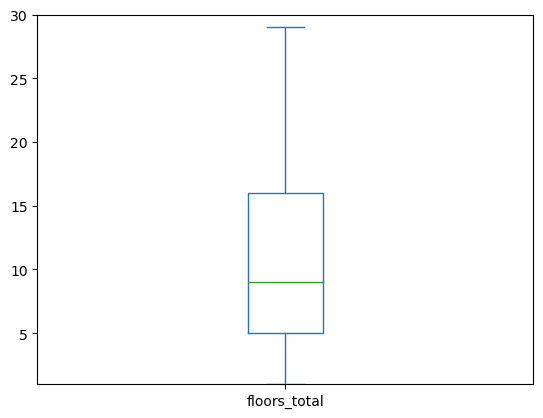

In [102]:
(data['floors_total']).plot(kind="box")
plt.ylim(1, 30)

In [103]:
idx = data.loc[data['floors_total'] > 30].index
data.drop(idx, inplace=True)

In [104]:
#'living_area' 

(data['living_area']).describe()

count    19462.000000
mean        29.292749
std         12.061185
min          2.000000
25%         18.000000
50%         28.400000
75%         37.900000
max         88.000000
Name: living_area, dtype: float64

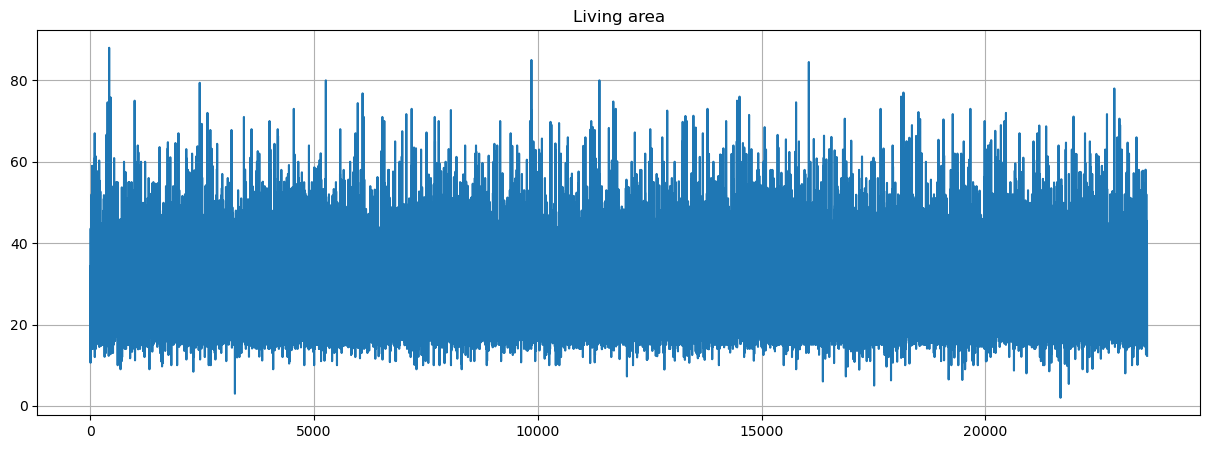

In [105]:
(data['living_area']).plot(y=(data['living_area']), title='Living area', grid=True, figsize=(15,5));

(2.0, 70.0)

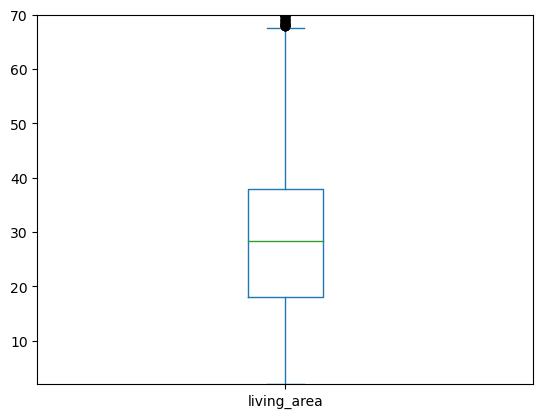

In [106]:
(data['living_area']).plot(kind="box")
plt.ylim(2, 70)

In [107]:
idx = data.loc[data['living_area'] > 70].index
data.drop(idx, inplace=True)

In [108]:
#'floor' 

(data['floor']).describe()

count     19417.0
mean       6.0772
std      4.967329
min           1.0
25%           2.0
50%           5.0
75%           8.0
max          27.0
Name: floor, dtype: Float64

The values appear to be reasonable. Moving on to the next column, 'studio' and 'open_plan.' These are boolean columns, and there should be no anomalies or outliers. Let's proceed to the next column.

In [109]:
#'kitchen_area' 

(data['kitchen_area']).describe()

count    19417.000000
mean         8.482742
std          4.394292
min          0.000000
25%          6.100000
50%          8.380000
75%         10.700000
max         50.000000
Name: kitchen_area, dtype: float64

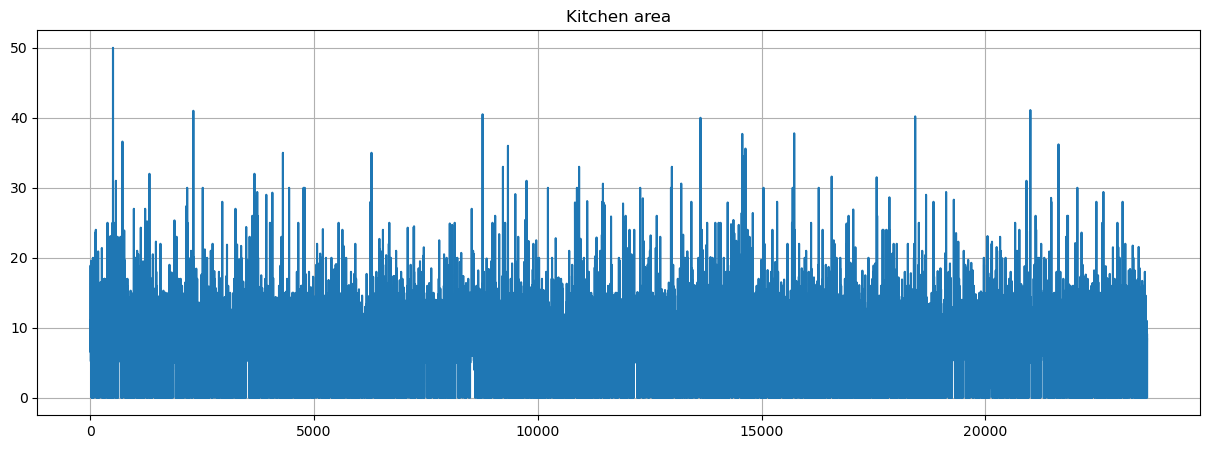

In [110]:
(data['kitchen_area']).plot(y=(data['kitchen_area']), title='Kitchen area', grid=True, figsize=(15,5));

(0.0, 20.0)

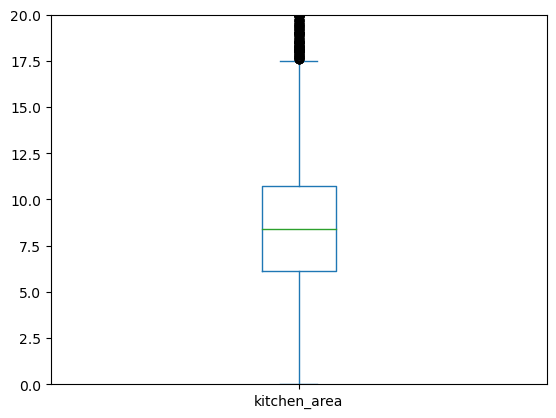

In [111]:
(data['kitchen_area']).plot(kind="box")
plt.ylim(0, 20)

In [112]:
idx = data.loc[data['kitchen_area'] > 17.5].index
data.drop(idx, inplace=True)

In [113]:
#'balcony'

(data['balcony']).describe()

count     18924.0
mean     0.610653
std      0.940026
min           0.0
25%           0.0
50%           0.0
75%           1.0
max           5.0
Name: balcony, dtype: Float64

(0.0, 5.0)

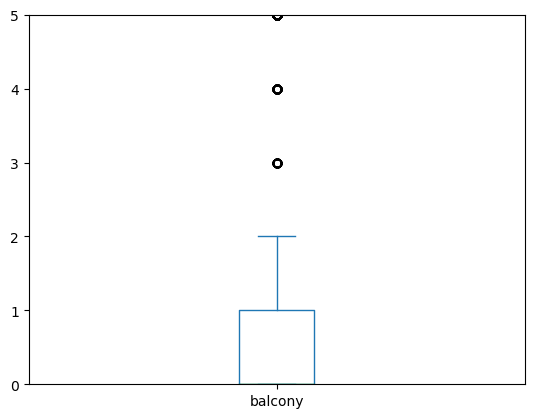

In [114]:
(data['balcony']).plot(kind="box")
plt.ylim(0, 5)

In [115]:
idx = data.loc[data['balcony'] > 2].index
data.drop(idx, inplace=True)

With the 'locality_name' column, we've already worked on it earlier, and the locality names don't raise any questions. Let's display the names of localities and their corresponding number of listings on the screen.

In [116]:
#'locality_name'
data['locality_name'].value_counts()

Санкт-Петербург                                            11447
посёлок посёлок Мурино                                       512
посёлок Шушары                                               417
Всеволожск                                                   353
посёлок Парголово                                            312
Колпино                                                      301
Пушкин                                                       287
Гатчина                                                      270
деревня деревня Кудрово                                      269
Выборг                                                       200
Петергоф                                                     178
деревня Кудрово                                              154
Красное Село                                                 153
Сестрорецк                                                   133
Ломоносов                                                    124
Сертолово                

In the current study, there are no questions related to the dependency on the locality. Therefore, we won't delve into further processing and grouping of these values. Let's move on to the next column.

In [117]:
#'airports_nearest'

(data['airports_nearest']).describe()

count    13697.000000
mean     29039.564576
std      13428.820802
min          0.000000
25%      17518.000000
50%      27753.000000
75%      38900.000000
max      84869.000000
Name: airports_nearest, dtype: float64

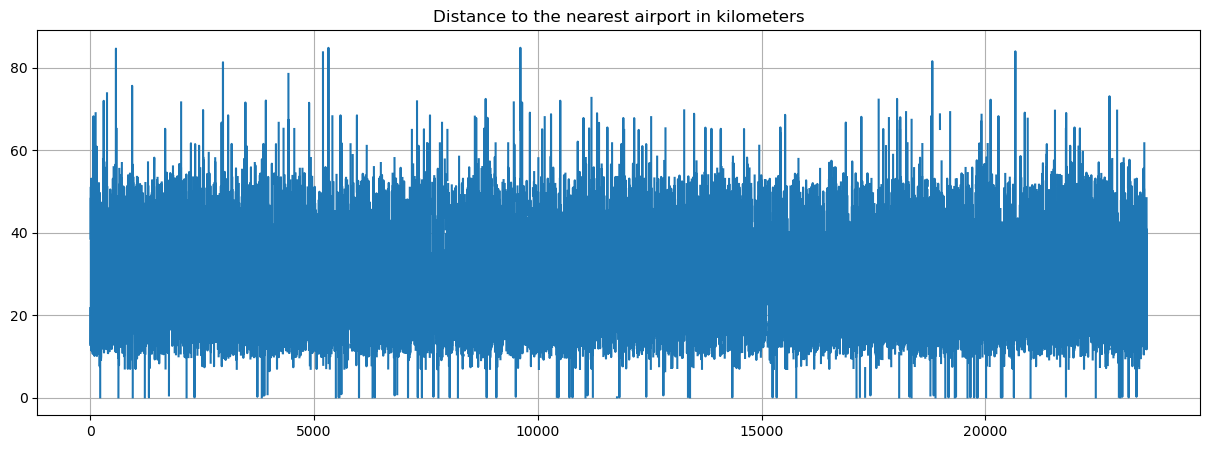

In [118]:
(data['airports_nearest']/1000).plot(y=(data['airports_nearest']), 
                                     title='Distance to the nearest airport in kilometers', grid=True, figsize=(15,5));

(6.0, 70.0)

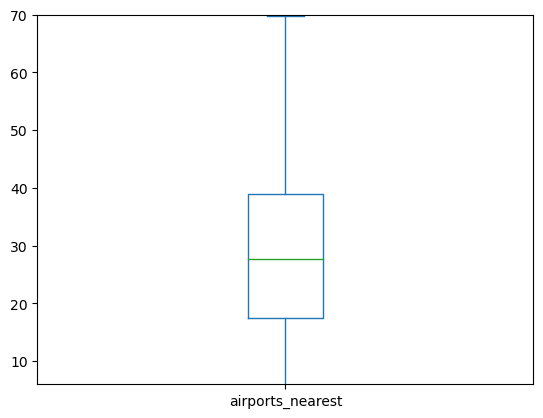

In [119]:
(data['airports_nearest']/1000).plot(kind="box")
plt.ylim(6, 70)

In [120]:
idx = data.loc[data['airports_nearest'] > 70000].index
#idx
data.drop(idx, inplace=True)

In [121]:
#'city_сenters_nearest'

(data['city_сenters_nearest']).describe()

KeyError: 'city_сenters_nearest'

<Axes: title={'center': 'Distance to the city center in kilometers'}>

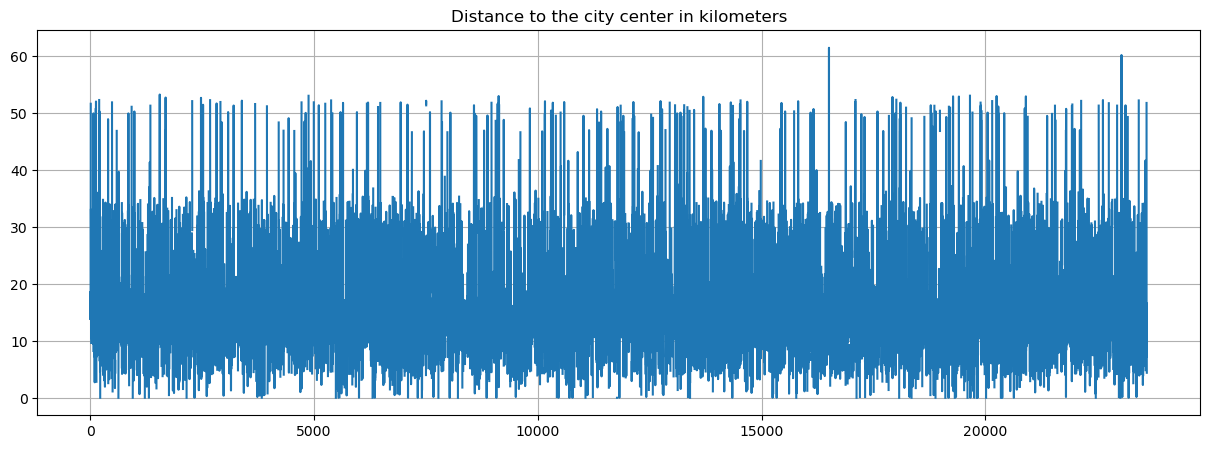

In [126]:
(data['city_centers_nearest']/1000).plot(y=(data['city_centers_nearest']/1000),
                                         title='Distance to the city center in kilometers', grid=True, figsize=(15,5))

(3.0, 26.0)

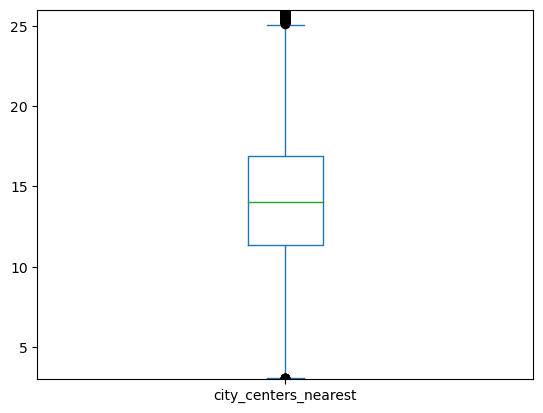

In [127]:
(data['city_centers_nearest']/1000).plot(kind="box")
plt.ylim(3, 26)

In [129]:
idx = data.loc[data['city_centers_nearest'] > 25000].index
#idx
data.drop(idx, inplace=True)

In [130]:
#'parks_around_3000'

(data['parks_around_3000']).describe()

count     16916.0
mean     0.343462
std      0.619826
min           0.0
25%           0.0
50%           0.0
75%           1.0
max           3.0
Name: parks_around_3000, dtype: Float64

Values do not raise any questions

In [131]:
#'ponds_around_3000'

(data['ponds_around_3000']).describe()

count     16916.0
mean     0.442599
std      0.738665
min           0.0
25%           0.0
50%           0.0
75%           1.0
max           3.0
Name: ponds_around_3000, dtype: Float64

Values do not raise any questions

In [132]:
#'parks_nearest'

(data['parks_nearest']).describe()

count    11826.000000
mean       486.406181
std        217.164012
min          1.000000
25%        461.000000
50%        461.000000
75%        461.000000
max       3190.000000
Name: parks_nearest, dtype: float64

<Axes: title={'center': 'Distance to the nearest park'}>

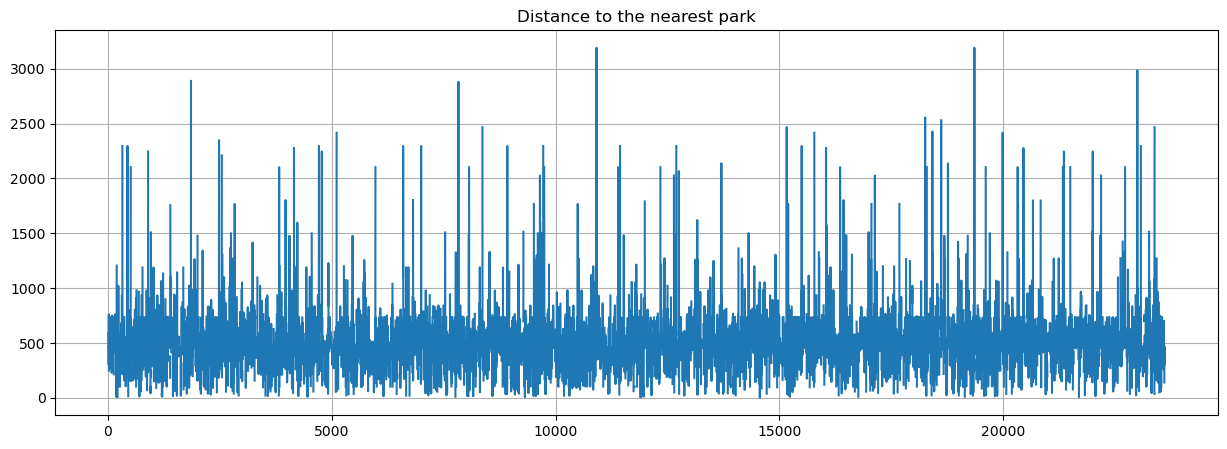

In [133]:
(data['parks_nearest']).plot(y=(data['parks_nearest']),
                             title='Distance to the nearest park', grid=True, figsize=(15,5))

<Axes: >

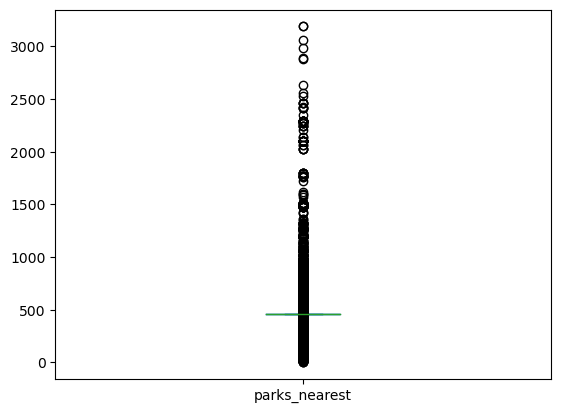

In [134]:
(data['parks_nearest']).plot(kind="box")
#plt.ylim(450, 500)

Values do not raise any questions

In [135]:
#days_exposition

(data['days_exposition']).describe()

count    15144.000000
mean       166.657818
std        205.279168
min          1.000000
25%         42.000000
50%         89.000000
75%        208.000000
max       1553.000000
Name: days_exposition, dtype: float64

<Axes: title={'center': 'Number of days from publication to withdrawal'}>

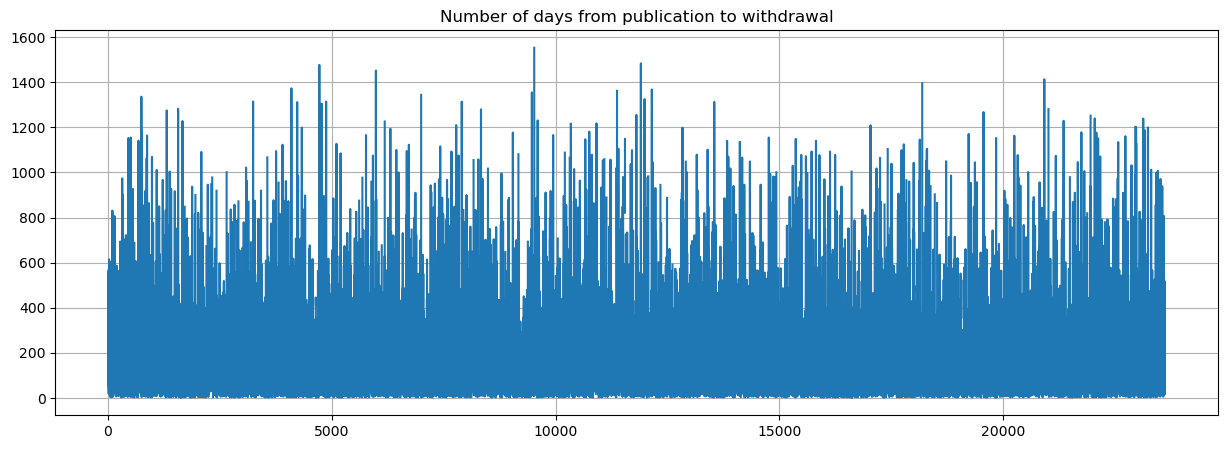

In [136]:
(data['days_exposition']).plot(y=(data['days_exposition']),
                               title='Number of days from publication to withdrawal', grid=True, figsize=(15,5))

(1.0, 800.0)

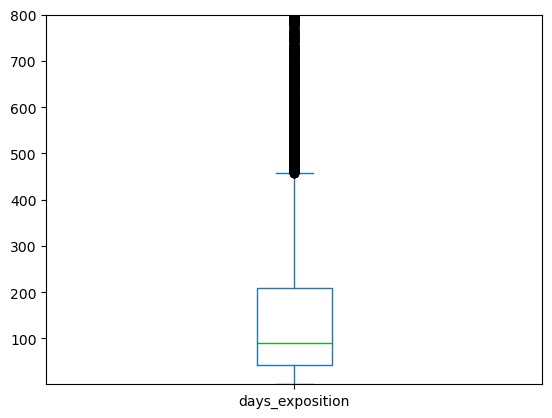

In [137]:
(data['days_exposition']).plot(kind="box")
plt.ylim(1, 800)

In [138]:
idx = data.loc[data['days_exposition'] > 1000].index
#idx
data.drop(idx, inplace=True)

Add a few new columns for further analysis:

In [139]:
# Price per square meter

data['sq_meter_price'] = data['last_price'] / data['total_area']
data['sq_meter_price'].head()


1    82920.792079
2    92785.714286
5    95065.789474
6    99195.710456
8    87454.764777
Name: sq_meter_price, dtype: Float64

In [140]:
# Day of the week of the listing publication
data['exposition_day'] = data['first_day_exposition'].dt.weekday

# Month of the listing publication
data['exposition_month'] = data['first_day_exposition'].dt.month

# Year of the listing publication
data['exposition_year'] = data['first_day_exposition'].dt.year


In [141]:
# Apartment floor type (values - "first", "last", "other")

def get_floor_type(row):
    if row['floor'] == 1:
        return 'First'
    if row['floor'] == row['floors_total']:
        return 'Last'
    return 'Other'

data['floor_type'] = data.apply(get_floor_type, axis=1)

In [166]:
# Distance to the city center in kilometers

data['city_centers_nearest_in_k'] = round(data['city_centers_nearest'] / 1000)


## Exploratory Data Analysis

We will examine the following property parameters:

- Total area
- Living area
- Kitchen area
- Property price
- Number of rooms
- Ceiling height
- Apartment floor
- Apartment floor type ('first,' 'last,' 'other')
- Total number of floors in the building
- Distance to the city center in meters
- Distance to the nearest airport
- Distance to the nearest park
- Day and month of the listing publication date.

We will create separate histograms for each of these parameters

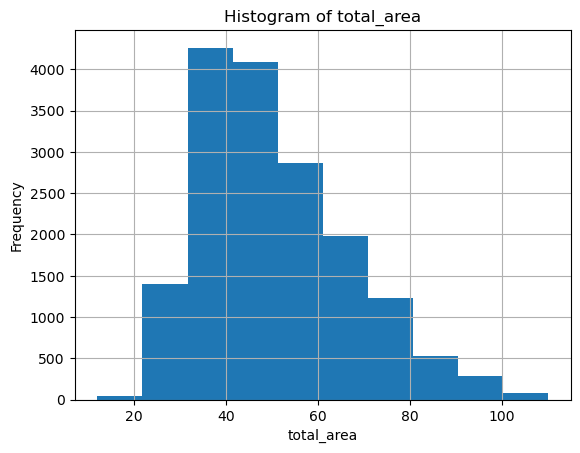

count    16764.000000
mean        50.501189
std         16.275408
min         12.000000
25%         38.000000
50%         46.200000
75%         60.300000
max        110.000000
Name: total_area, dtype: float64


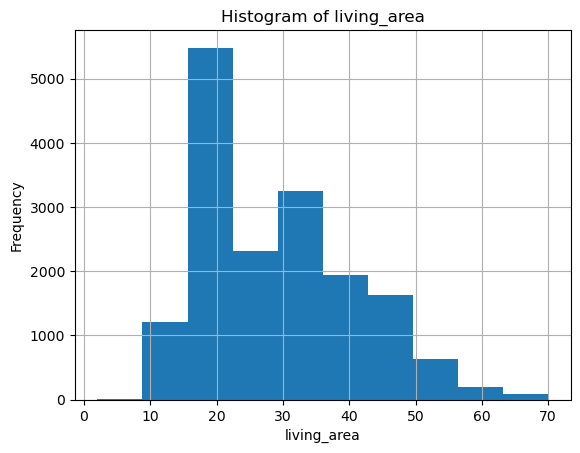

count    16764.000000
mean        28.865559
std         11.721533
min          2.000000
25%         18.000000
50%         28.000000
75%         37.000000
max         70.000000
Name: living_area, dtype: float64


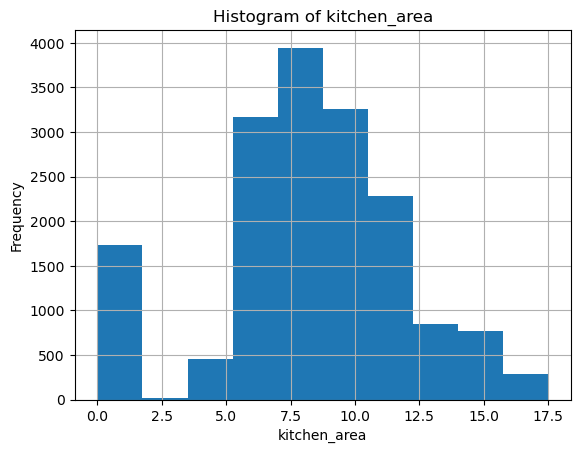

count    16764.000000
mean         8.118910
std          3.781732
min          0.000000
25%          6.100000
50%          8.300000
75%         10.400000
max         17.500000
Name: kitchen_area, dtype: float64


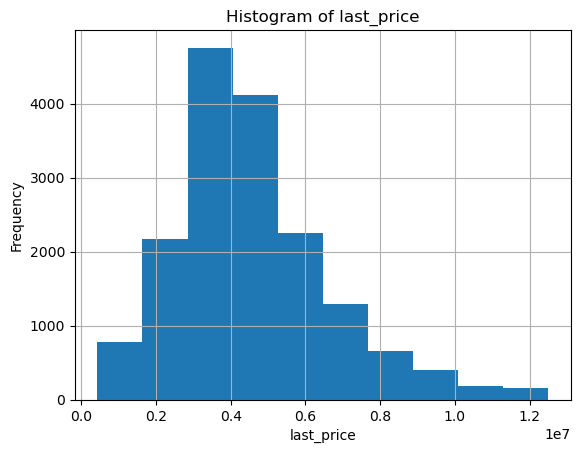

count           16764.0
mean      -41292.367096
std      2073397.036824
min            430000.0
25%           3200000.0
50%           4227494.0
75%           5600000.0
max          12500000.0
Name: last_price, dtype: Float64


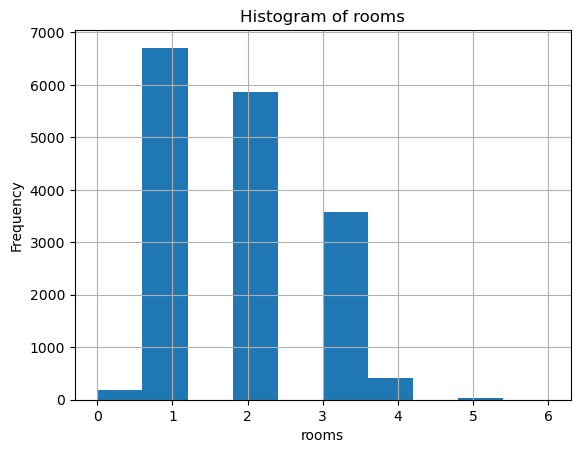

count     16764.0
mean     1.846994
std      0.864657
min           0.0
25%           1.0
50%           2.0
75%           2.0
max           6.0
Name: rooms, dtype: Float64


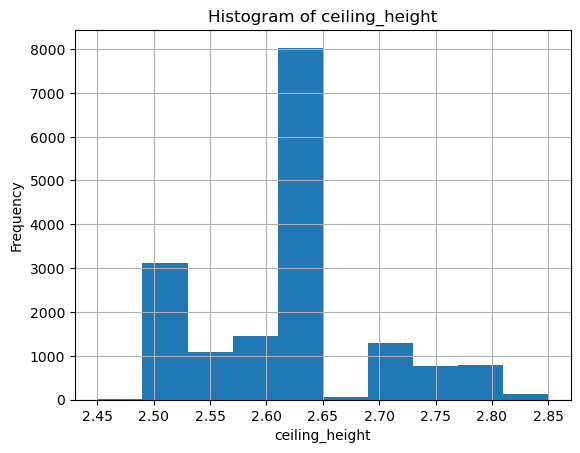

count    16764.000000
mean         2.628154
std          0.080642
min          2.450000
25%          2.570000
50%          2.650000
75%          2.650000
max          2.850000
Name: ceiling_height, dtype: float64


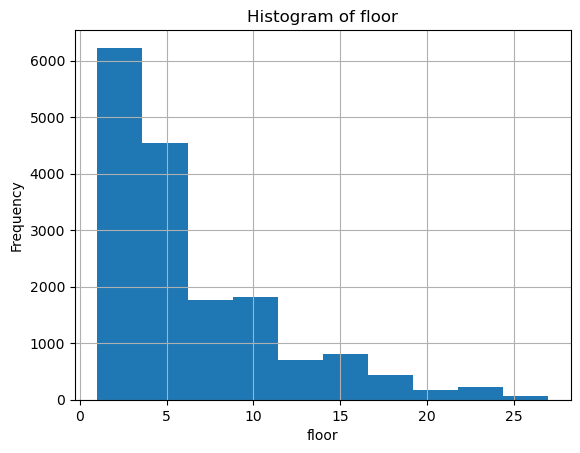

count     16764.0
mean     6.212121
std      5.030905
min           1.0
25%           2.0
50%           5.0
75%           9.0
max          27.0
Name: floor, dtype: Float64


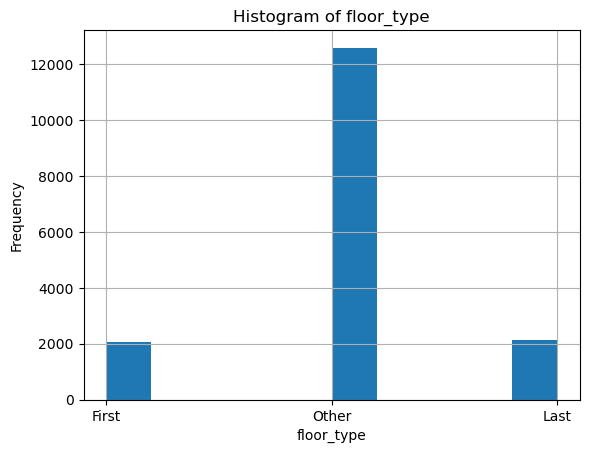

count     16764
unique        3
top       Other
freq      12579
Name: floor_type, dtype: object


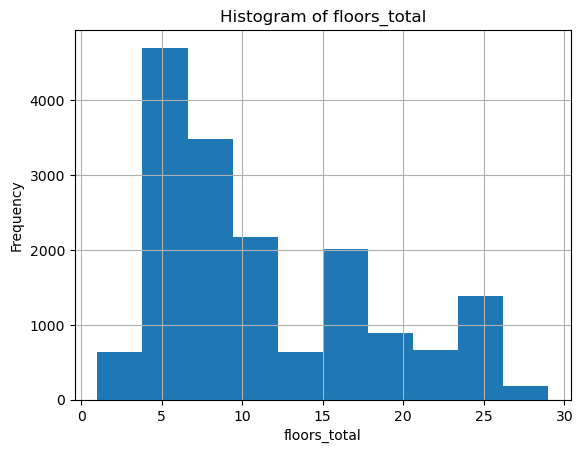

count      16764.0
mean     11.446791
std       6.665402
min            1.0
25%            5.0
50%            9.0
75%           16.0
max           29.0
Name: floors_total, dtype: Float64


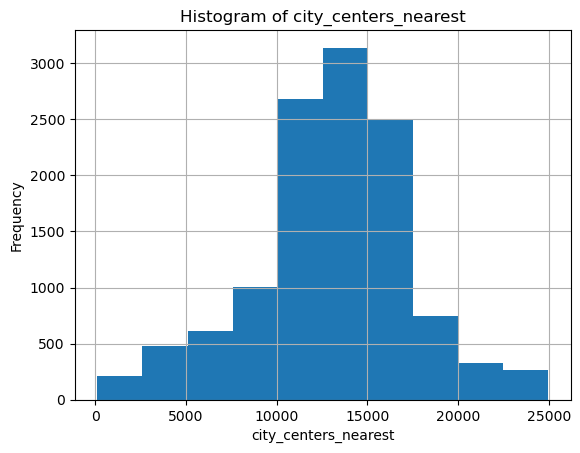

count    11953.000000
mean     13099.016021
std       4350.236525
min        103.000000
25%      10983.000000
50%      13311.000000
75%      15744.000000
max      24972.000000
Name: city_centers_nearest, dtype: float64


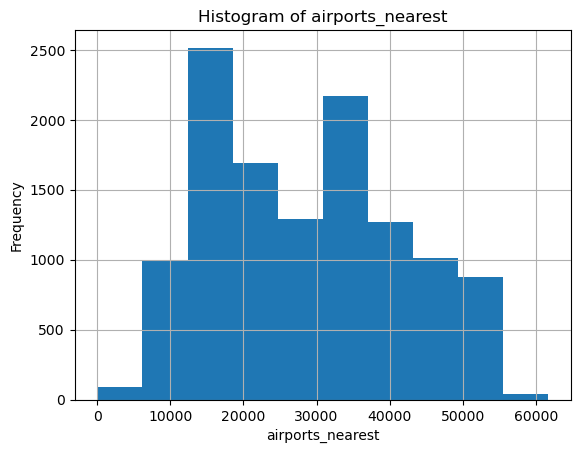

count    11953.000000
mean     28520.879905
std      13007.899537
min          0.000000
25%      16755.000000
50%      28275.000000
75%      38029.000000
max      61710.000000
Name: airports_nearest, dtype: float64


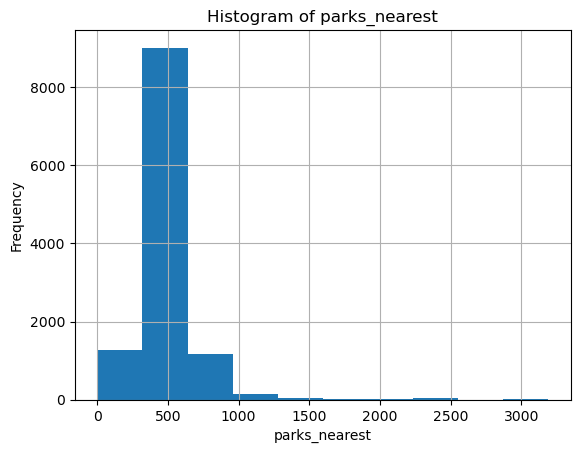

count    11714.000000
mean       485.918772
std        215.200803
min          1.000000
25%        461.000000
50%        461.000000
75%        461.000000
max       3190.000000
Name: parks_nearest, dtype: float64


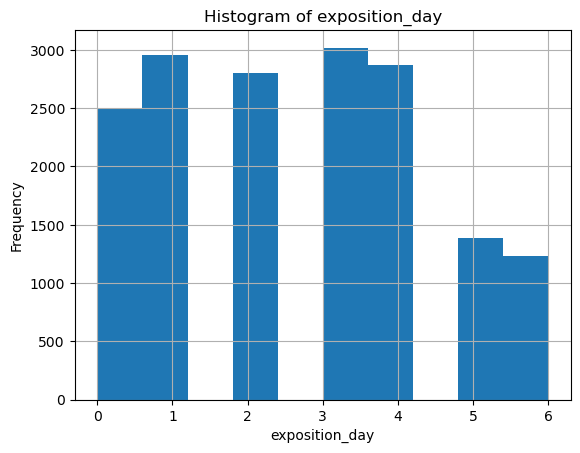

count    16764.00000
mean         2.59073
std          1.79211
min          0.00000
25%          1.00000
50%          3.00000
75%          4.00000
max          6.00000
Name: exposition_day, dtype: float64


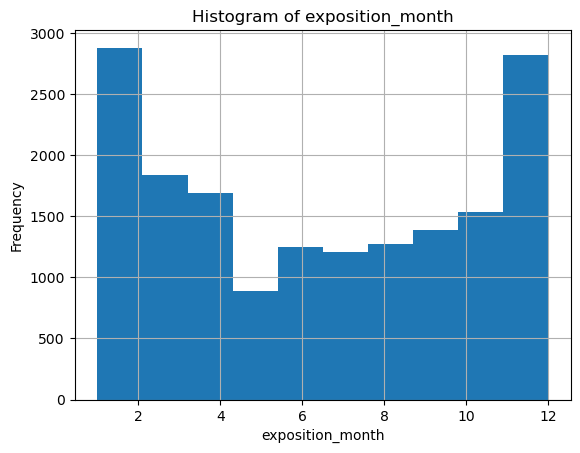

count    16764.000000
mean         6.416846
std          3.481204
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64


In [170]:
def plot_and_describe(data, column_name):
    
    data[column_name].hist()
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show() 
    

    description = data[column_name].describe()
    print(description)

columns_to_plot = ['total_area',
                   'living_area',
                   'kitchen_area',
                   'last_price',
                   'rooms',
                   'ceiling_height',
                   'floor',
                   'floor_type',
                   'floors_total',
                   'city_centers_nearest',
                   'airports_nearest',
                   'parks_nearest',
                   'exposition_day',
                   'exposition_month']

for column in columns_to_plot:
    plot_and_describe(data, column)


In summary, the dataset provides insights into various aspects of property listings. Here are the key findings:

1. Property Size:
   - The total area of properties ranges from 12 sq. m to 110 sq. m, with a common range around 50 sq. m.
   - Living area varies from 2 sq. m to 70 sq. m, with the most common range being 18 to 37 sq. m.
   - Kitchen areas typically fall between 6 to 10 sq. m.

2. Pricing:
   - Property prices at the time of listing range from 430 thousand rubles to 12.5 million rubles.
   - Most listings are priced between 3.2 to 5.6 million rubles.

3. Number of Rooms:
   - Listings include properties with 0 to 6 rooms, but one- and two-bedroom apartments are the most common.

4. Ceiling Height:
   - Ceiling heights for apartments range from 2.45 m to 2.85 m, with 2.57 to 2.65 m being the most common.

5. Floor Level:
   - Properties are situated on floors ranging from 1 to 27, with listings primarily on floors 1 to 9.
   - Most listings are not on the first or last floors.

6. Building Characteristics:
   - Most properties are in buildings with 5-16 floors.

7. Location:
   - A significant portion of listings are within 16 km of the city center (note that this analysis pertains to St. Petersburg).
   - Listings are also within 39 km of the airport.
   - The majority of properties are approximately 500 meters from a park.

8. Listing Trends:
   - Most listings were published on Thursdays, with fewer on weekends.
   - The highest frequency of listings occurred in January and December.

These findings provide valuable insights into the property market, helping potential buyers and sellers better understand the trends and characteristics of available properties.

Let's check **how fast the apartments were sold** (days_exposition column). This parameter shows how many days each ad was posted.


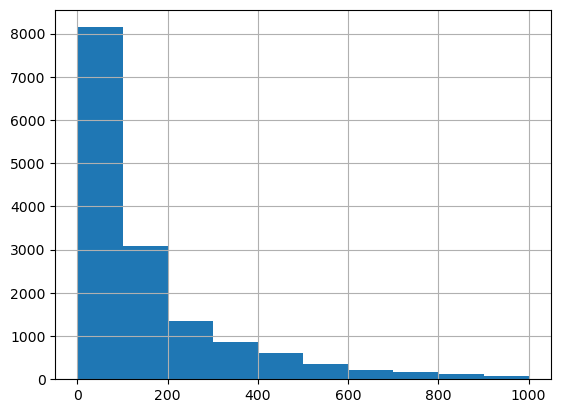

In [144]:
plot_and_describe(data, 'days_exposition')

(1.0, 750.0)

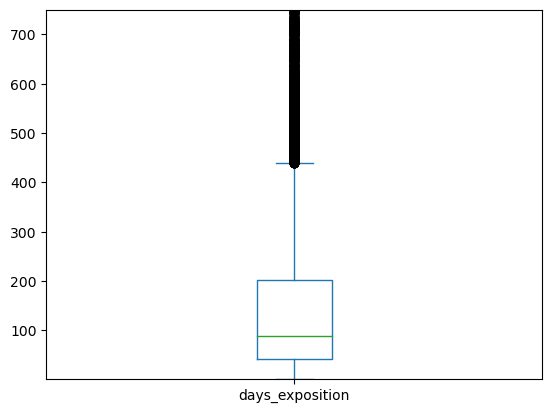

In [145]:
(data['days_exposition']).plot(kind="box")
plt.ylim(1, 750)

The average is 137, the median is 70.

Usually a sale takes about two months (median value - 70 days). Fast sales can be considered those that occurred faster than 36 days (the value of the first quartile). Unusually long - more than 400 days (third quartile + 1.5 interquartile range)

Now let's find out: **which factors influence the total (full) value of the object**. Let's calculate the correlation of each parameter with "price", the only dependent variable, in descending order:

In [171]:
data.corr()[['last_price']].sort_values(by='last_price', ascending=False)

,last_price
last_price,1.000000
total_area,0.666120
sq_meter_price,0.651687
living_area,0.540416
rooms,0.400466
kitchen_area,0.352370
ponds_around_3000,0.296829
floors_total,0.293749
parks_around_3000,0.245603
ceiling_height,0.231730


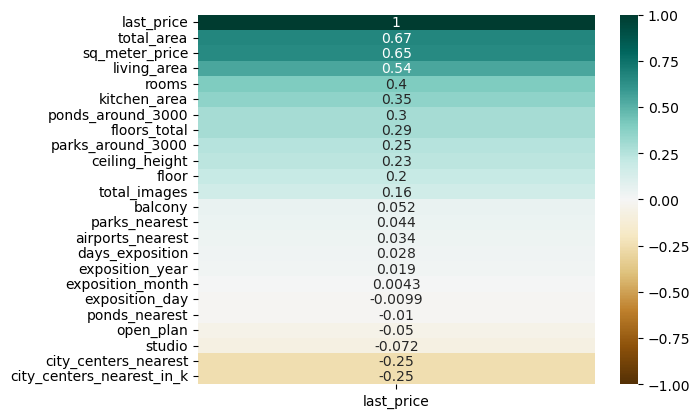

In [172]:
sns.heatmap(data.corr()[['last_price']].sort_values(
    by='last_price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG');

The heat map shows that the following parameters of the property have the greatest influence on the price:

- total area (correlation is positive, coefficient 0.66)

- living area (positive correlation, coefficient 0.54)

- number of rooms (positive correlation, coefficient 0.40)

- kitchen area (positive correlation, coefficient 0.52)

Kitchen area (correlation positive, coefficient 0.36) and distance to the city center (correlation negative, coefficient -0.25) have less significant influence. 

Let's consider these parameters separately.

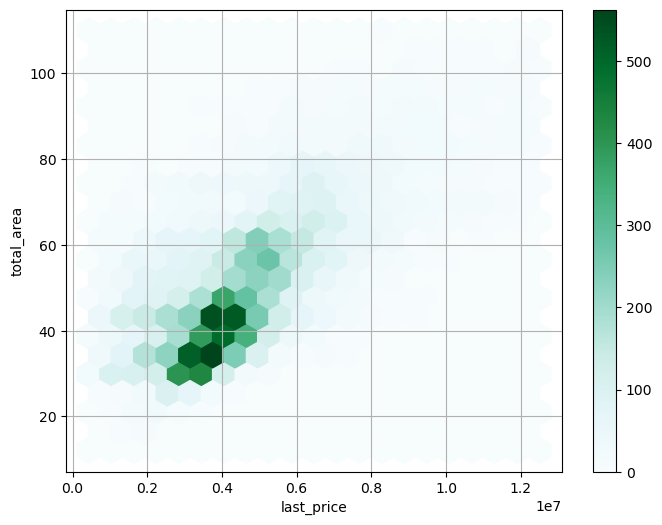

In [148]:
# whether the price depend on the total area

data.plot(x='last_price', y='total_area', kind='hexbin', 
          gridsize=20, figsize=(8, 6), sharex=False, grid=True);

With the increase in the total area, there is also an increase in the value of the property. The increase is especially noticeable in the range up to 50 m2.

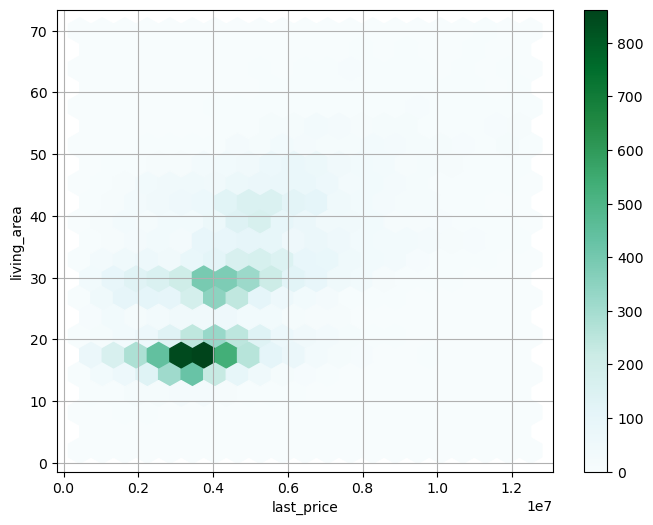

In [149]:
# whether the price depend on the living area
data.plot(x='last_price', y='living_area', kind='hexbin',
          gridsize=20, figsize=(8, 6), sharex=False, grid=True);

As the living space increases, there is also an increase in the value of the property. 

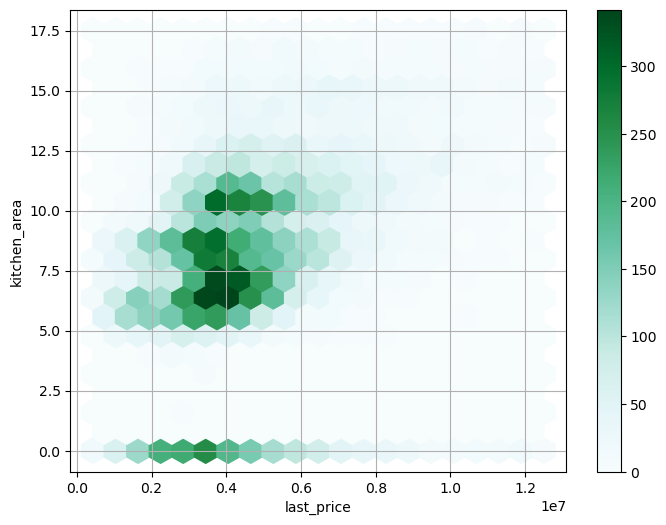

In [150]:
# whether the price depend on the size of the kitchen

data.plot(x= 'last_price', y='kitchen_area', kind='hexbin',
          gridsize=20, figsize=(8, 6), sharex=False, grid=True);

As the living area increases, there is a slight increase in the value of the property. 

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

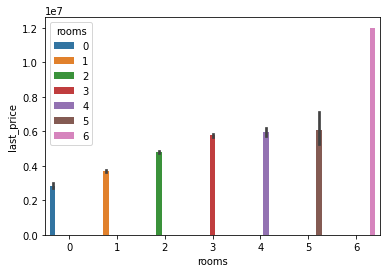

In [191]:
sns.barplot(x= 'rooms', y='last_price', hue="rooms", data=data)

As the number of rooms increases from 0 to 3, there is an increase in price.

<AxesSubplot:xlabel='exposition_day', ylabel='last_price'>

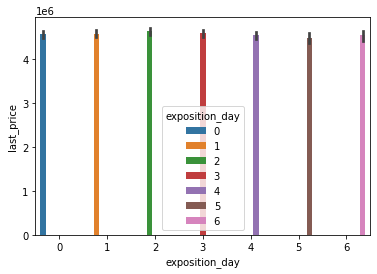

In [193]:
# Whether the price depends on the date of posting (day of the week, month, year)
  
sns.barplot(x="exposition_day", y="last_price", hue="exposition_day", data=data)

The day of the week on which the ad was placed does not have a significant impact on the value of the property.

<AxesSubplot:xlabel='exposition_month', ylabel='last_price'>

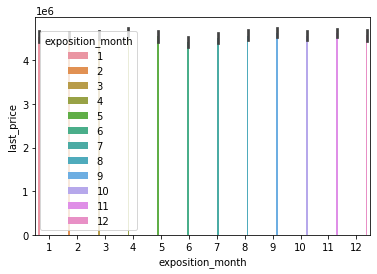

In [194]:
sns.barplot(x="exposition_month", y="last_price", hue="exposition_month", data=data)

The month in which the ad was placed does not have a significant impact on the value of the property.

<AxesSubplot:xlabel='exposition_year', ylabel='last_price'>

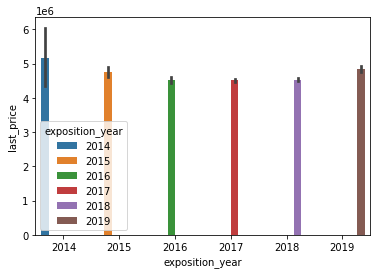

In [195]:
sns.barplot(x="exposition_year", y="last_price", hue="exposition_year", data=data)

Set properties sold in 2014 were priced higher than in other years.

Let's calculate **average price per square meter** in 10 settlements with the largest number of ads. Highlight the settlements with the highest and lowest price per square meter. 

In [156]:
data['locality_name'].value_counts()

Санкт-Петербург                                            11261
посёлок посёлок Мурино                                       508
Всеволожск                                                   349
посёлок Парголово                                            311
Гатчина                                                      270
деревня деревня Кудрово                                      264
посёлок Шушары                                               239
Выборг                                                       200
деревня Кудрово                                              153
Сертолово                                                    119
Кириши                                                       118
деревня Новое Девяткино                                      116
Сланцы                                                       106
посёлок Бугры                                                104
Кингисепп                                                    100
Волхов                   

In [157]:
# group the data by average price per m2 and by number of listings 
# in different localities:

data_pivot_sq_m_price = data.pivot_table(index='locality_name', values='sq_meter_price',
                 aggfunc=['mean', 'count'])
# let's work with multi-indexes:
data_pivot_sq_m_price = data_pivot_sq_m_price.stack(1).reset_index(1)
data_pivot_sq_m_price.columns = ["Price per square meter", "Average value", "Number of ads"]
data_pivot_sq_m_price

,Price per square meter,Average value,Number of ads
locality_name,,,
Бокситогорск,sq_meter_price,17457.330124,15
Волосово,sq_meter_price,40183.325974,36
Волхов,sq_meter_price,35011.300785,99
Всеволожск,sq_meter_price,66777.322235,349
Выборг,sq_meter_price,57552.661796,200
Высоцк,sq_meter_price,38105.196126,3
Гатчина,sq_meter_price,68195.902817,270
Ивангород,sq_meter_price,33029.66708,25
Каменногорск,sq_meter_price,28844.905218,12


In [158]:
# sort the values by the number of ads in descending order

data_pivot_sq_m_price.sort_values(by="Number of ads", ascending=False)

# get the list of average price per square meter for 10 settlements
# with the largest number of ads

data_pivot_sq_m_price.loc[data_pivot_sq_m_price['Number of ads'] > 118].sort_values(
    by="Number of ads", ascending=False)

,Price per square meter,Average value,Number of ads
locality_name,,,
Санкт-Петербург,sq_meter_price,104808.498004,11261
посёлок посёлок Мурино,sq_meter_price,85847.610667,508
Всеволожск,sq_meter_price,66777.322235,349
посёлок Парголово,sq_meter_price,90753.561563,311
Гатчина,sq_meter_price,68195.902817,270
деревня деревня Кудрово,sq_meter_price,93233.351433,264
посёлок Шушары,sq_meter_price,80896.800796,239
Выборг,sq_meter_price,57552.661796,200
деревня Кудрово,sq_meter_price,99807.04721,153


In [181]:
# sort the values by the number of ads in descending order

data_pivot_sq_m_price.sort_values(by='Average value', ascending=False)

# get the list of average values of price per square meter for 10 settlements
# with the highest prices

data_pivot_sq_m_price.loc[data_pivot_sq_m_price['Average value'] > 82000].sort_values(by="Average value", ascending=False)

,Price per square meter,Average value,Number of ads
locality_name,,,
Санкт-Петербург,sq_meter_price,104808.498004,11261
деревня Кудрово,sq_meter_price,99807.04721,153
Пушкин,sq_meter_price,98181.106888,18
посёлок Мурино,sq_meter_price,96440.973576,30
деревня Мистолово,sq_meter_price,95630.326493,10
деревня деревня Кудрово,sq_meter_price,93233.351433,264
посёлок Парголово,sq_meter_price,90753.561563,311
посёлок Стрельна,sq_meter_price,87991.115356,37
посёлок посёлок Мурино,sq_meter_price,85847.610667,508


In [180]:
# sort the values by the number of ads in ascending order

data_pivot_sq_m_price.sort_values(by="Average value")

# get the list of average price per square meter for 10 settlements
# with the lowest prices

data_pivot_sq_m_price.loc[data_pivot_sq_m_price['Average value'] < 14000].sort_values(by="Average value")

,Price per square meter,Average value,Number of ads
locality_name,,,
деревня Старополье,sq_meter_price,11206.221198,3
посёлок станции Свирь,sq_meter_price,11481.481481,2
деревня Вахнова Кара,sq_meter_price,11688.311688,1
деревня Выскатка,sq_meter_price,12335.480902,2
посёлок Совхозный,sq_meter_price,12629.129129,2
деревня Малая Романовка,sq_meter_price,12724.550898,1
посёлок Тёсово-4,sq_meter_price,12931.034483,1
деревня Бор,sq_meter_price,13157.894737,1
деревня Сижно,sq_meter_price,13709.677419,1


The highest cost per square meter is in St. Petersburg - about 105 thousand rubles. 
The lowest is in the village of Staropolye - about 11 thousand rubles.

Let's select apartments in St. Petersburg using the locality_name column and calculate the average price of each kilometer.

In [178]:
S_P_sq_meter_price  = (data.loc[data['locality_name']=="Санкт-Петербург"]['sq_meter_price']).mean()
S_P_city_сenters = (data.loc[data['locality_name']=="Санкт-Петербург"]['city_centers_nearest_in_k']).mean()
S_P_sq_met_to_city_center = S_P_sq_meter_price/S_P_city_сenters

print(round(S_P_sq_met_to_city_center))

8180


## Conclusion

A study of the Yandex Realty service was conducted, which involved analyzing an archive of real estate listings for several years for apartments in St. Petersburg and nearby areas. Each apartment in the database had two types of data: user-added data and map-related data. The first type included the apartment's area, floor, and the number of balconies, while the second type included distances to the city center, the airport, and the nearest park.


During the research, data preprocessing and analysis were carried out. During the preprocessing stage, columns with missing values were identified, which were subsequently either filled in or removed from the dataset. Data types in the columns: "first_day_exposition," "is_apartment," 'open_plan,' "studio," "total_images," 'rooms,' 'floors_total,' 'floor,' 'balcony,' 'parks_around_3000,' 'ponds_around_3000,' 'last_price' were changed. Duplicate entries were also checked and removed. Rows with outliers and abnormal values were excluded.


Subsequently, columns were added to the table with the following parameters:
- Price per square meter.
- Day of the week when the listing was published (0 - Monday, 1 - Tuesday, and so on).
- Month of the listing publication.
- Year of the listing publication.
- Type of apartment floor (values - "first," "last," "other").
- Distance to the city center in kilometers (converted from meters to kilometers and rounded to whole values).


During the data analysis stage, the parameters of real estate objects were studied and separate histograms were constructed for each of them.


It was determined that the average sale duration is approximately two months (median value - 70 days). Sales that occur faster than 36 days (first quartile value) can be considered fast, while those lasting longer than 400 days (third quartile + 1.5 times the interquartile range) are unusually long.


The factors that most significantly affect the total price of a property are:

- Total area (positive correlation, coefficient 0.66).
- Living area (positive correlation, coefficient 0.54).
- Number of rooms (positive correlation, coefficient 0.40).
- Kitchen area (positive correlation, coefficient 0.52).

Less significant factors include kitchen area (positive correlation, coefficient 0.36) and distance to the city center (negative correlation, coefficient -0.25).


As the number of rooms increases up to 3, the property's price rises, but beyond that, the price growth slows down.


Properties not located on the first or last floor have a higher price. Apartments on the first floor are priced lower than others.


The day of the week and the month of listing do not influence the property's price.


The highest price per square meter is in St. Petersburg, around 105,000 rubles, while the lowest is in the village of Staropolie, around 11,000 rubles.


The study also revealed that the price of properties depends on the distance to the city center: each kilometer closer to the city center in St. Petersburg increases the property's price by 8,500 rubles.